In [1]:


import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from numpy import nan
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix



In [2]:
data = pd.read_csv("Project/earthquake.csv")

Numeric_Data = data.select_dtypes(include=["float32","float64","int32","int64","uint8"])

In [3]:
data

,id,date,time,lat,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb
0,2.000000e+13,2003.05.20,12:17:44 AM,39.04,40.38,turkey,bingol,baliklicay,west,0.1,10.0,4.1,4.1,0.0,NaN,0.0,0.0
1,2.010000e+13,2007.08.01,12:03:08 AM,40.79,30.09,turkey,kocaeli,bayraktar_izmit,west,0.1,5.2,4.0,3.8,4.0,NaN,0.0,0.0
2,1.980000e+13,1978.05.07,12:41:37 AM,38.58,27.61,turkey,manisa,hamzabeyli,south_west,0.1,0.0,3.7,0.0,0.0,NaN,0.0,3.7
3,2.000000e+13,1997.03.22,12:31:45 AM,39.47,36.44,turkey,sivas,kahvepinar_sarkisla,south_west,0.1,10.0,3.5,3.5,0.0,NaN,0.0,0.0
4,2.000000e+13,2000.04.02,12:57:38 AM,40.80,30.24,turkey,sakarya,meseli_serdivan,south_west,0.1,7.0,4.3,4.3,0.0,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24002,2.020000e+13,2017.03.10,12:23:42 AM,37.50,38.48,turkey,adiyaman,kirmacik_samsat,NaN,NaN,13.0,4.2,0.0,4.2,4.0,0.0,0.0
24003,2.020000e+13,2017.03.10,12:42:44 AM,40.47,35.84,turkey,amasya,kizoglu,NaN,NaN,5.6,3.6,0.0,3.5,3.6,0.0,0.0
24004,2.020000e+13,2017.04.05,12:08:11 AM,38.63,27.57,turkey,manisa,cavusoglu,NaN,NaN,10.6,4.1,0.0,4.0,4.1,0.0,0.0
24005,2.020000e+13,2017.04.05,12:35:09 AM,38.65,27.55,turkey,manisa,cavusoglu,NaN,NaN,8.7,3.8,0.0,3.6,3.8,0.0,0.0


In [4]:
print(data.describe())

                 id           lat          long          dist         depth  \
count  2.400700e+04  24007.000000  24007.000000  10062.000000  24007.000000   
mean   1.991982e+13     37.929474     30.773229      3.175015     18.491773   
std    2.060396e+11      2.205605      6.584596      4.715461     23.218553   
min    1.910000e+13     29.740000     18.340000      0.100000      0.000000   
25%    1.980000e+13     36.190000     26.195000      1.400000      5.000000   
50%    2.000000e+13     38.200000     28.350000      2.300000     10.000000   
75%    2.010000e+13     39.360000     33.855000      3.600000     22.400000   
max    2.020000e+13     46.350000     48.000000     95.400000    225.000000   

                 xm            md       richter           mw            ms  \
count  24007.000000  24007.000000  24007.000000  5003.000000  24007.000000   
mean       4.056038      1.912346      2.196826     4.478973      0.677677   
std        0.574085      2.059780      2.081417     1.

In [5]:
data

,id,date,time,lat,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb
0,2.000000e+13,2003.05.20,12:17:44 AM,39.04,40.38,turkey,bingol,baliklicay,west,0.1,10.0,4.1,4.1,0.0,NaN,0.0,0.0
1,2.010000e+13,2007.08.01,12:03:08 AM,40.79,30.09,turkey,kocaeli,bayraktar_izmit,west,0.1,5.2,4.0,3.8,4.0,NaN,0.0,0.0
2,1.980000e+13,1978.05.07,12:41:37 AM,38.58,27.61,turkey,manisa,hamzabeyli,south_west,0.1,0.0,3.7,0.0,0.0,NaN,0.0,3.7
3,2.000000e+13,1997.03.22,12:31:45 AM,39.47,36.44,turkey,sivas,kahvepinar_sarkisla,south_west,0.1,10.0,3.5,3.5,0.0,NaN,0.0,0.0
4,2.000000e+13,2000.04.02,12:57:38 AM,40.80,30.24,turkey,sakarya,meseli_serdivan,south_west,0.1,7.0,4.3,4.3,0.0,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24002,2.020000e+13,2017.03.10,12:23:42 AM,37.50,38.48,turkey,adiyaman,kirmacik_samsat,NaN,NaN,13.0,4.2,0.0,4.2,4.0,0.0,0.0
24003,2.020000e+13,2017.03.10,12:42:44 AM,40.47,35.84,turkey,amasya,kizoglu,NaN,NaN,5.6,3.6,0.0,3.5,3.6,0.0,0.0
24004,2.020000e+13,2017.04.05,12:08:11 AM,38.63,27.57,turkey,manisa,cavusoglu,NaN,NaN,10.6,4.1,0.0,4.0,4.1,0.0,0.0
24005,2.020000e+13,2017.04.05,12:35:09 AM,38.65,27.55,turkey,manisa,cavusoglu,NaN,NaN,8.7,3.8,0.0,3.6,3.8,0.0,0.0


In [6]:
Numeric_Data


,id,lat,long,dist,depth,xm,md,richter,mw,ms,mb
0,2.000000e+13,39.04,40.38,0.1,10.0,4.1,4.1,0.0,NaN,0.0,0.0
1,2.010000e+13,40.79,30.09,0.1,5.2,4.0,3.8,4.0,NaN,0.0,0.0
2,1.980000e+13,38.58,27.61,0.1,0.0,3.7,0.0,0.0,NaN,0.0,3.7
3,2.000000e+13,39.47,36.44,0.1,10.0,3.5,3.5,0.0,NaN,0.0,0.0
4,2.000000e+13,40.80,30.24,0.1,7.0,4.3,4.3,0.0,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
24002,2.020000e+13,37.50,38.48,NaN,13.0,4.2,0.0,4.2,4.0,0.0,0.0
24003,2.020000e+13,40.47,35.84,NaN,5.6,3.6,0.0,3.5,3.6,0.0,0.0
24004,2.020000e+13,38.63,27.57,NaN,10.6,4.1,0.0,4.0,4.1,0.0,0.0
24005,2.020000e+13,38.65,27.55,NaN,8.7,3.8,0.0,3.6,3.8,0.0,0.0


In [7]:
data.info


<bound method DataFrame.info of                  id        date         time    lat   long country      city  \
0      2.000000e+13  2003.05.20  12:17:44 AM  39.04  40.38  turkey    bingol   
1      2.010000e+13  2007.08.01  12:03:08 AM  40.79  30.09  turkey   kocaeli   
2      1.980000e+13  1978.05.07  12:41:37 AM  38.58  27.61  turkey    manisa   
3      2.000000e+13  1997.03.22  12:31:45 AM  39.47  36.44  turkey     sivas   
4      2.000000e+13  2000.04.02  12:57:38 AM  40.80  30.24  turkey   sakarya   
...             ...         ...          ...    ...    ...     ...       ...   
24002  2.020000e+13  2017.03.10  12:23:42 AM  37.50  38.48  turkey  adiyaman   
24003  2.020000e+13  2017.03.10  12:42:44 AM  40.47  35.84  turkey    amasya   
24004  2.020000e+13  2017.04.05  12:08:11 AM  38.63  27.57  turkey    manisa   
24005  2.020000e+13  2017.04.05  12:35:09 AM  38.65  27.55  turkey    manisa   
24006  2.020000e+13  2017.04.05  12:25:25 AM  38.63  27.58  turkey    manisa   

       

In [8]:
print(Numeric_Data.corr())

               id       lat      long      dist     depth        xm        md  \
id       1.000000 -0.071851  0.104695  0.005693 -0.201035 -0.535262 -0.379838   
lat     -0.071851  1.000000  0.232346  0.079336 -0.241904 -0.010347  0.051100   
long     0.104695  0.232346  1.000000  0.028332 -0.064886  0.071856  0.107302   
dist     0.005693  0.079336  0.028332  1.000000  0.028694  0.004511 -0.004314   
depth   -0.201035 -0.241904 -0.064886  0.028694  1.000000  0.302926  0.042542   
xm      -0.535262 -0.010347  0.071856  0.004511  0.302926  1.000000  0.241432   
md      -0.379838  0.051100  0.107302 -0.004314  0.042542  0.241432  1.000000   
richter -0.152355 -0.032155 -0.140393  0.006295  0.150559  0.426653 -0.237586   
mw      -0.613444  0.040614  0.103712 -0.011798  0.215900  0.781860  0.623224   
ms      -0.672286  0.056228  0.043574 -0.009058  0.260246  0.699579  0.461104   
mb      -0.611488  0.015019  0.003432 -0.000091  0.313953  0.628382 -0.022863   

          richter        mw

In [9]:
print(Numeric_Data.cov())

                   id           lat          long          dist         depth  \
id       4.245230e+22 -3.265233e+10  1.420379e+11  5.161017e+09 -9.617411e+11   
lat     -3.265233e+10  4.864695e+00  3.374360e+00  4.628624e-01 -1.238816e+01   
long     1.420379e+11  3.374360e+00  4.335691e+01  7.744372e-01 -9.920082e+00   
dist     5.161017e+09  4.628624e-01  7.744372e-01  2.223557e+01  2.072458e+00   
depth   -9.617411e+11 -1.238816e+01 -9.920082e+00  2.072458e+00  5.391012e+02   
xm      -6.331304e+10 -1.310117e-02  2.716230e-01  1.193089e-02  4.037828e+00   
md      -1.612020e+11  2.321519e-01  1.455320e+00 -4.034421e-02  2.034571e+00   
richter -6.533824e+10 -1.476183e-01 -1.924122e+00  6.139630e-02  7.276153e+00   
mw      -2.134758e+11  1.049588e-01  7.531586e-01 -4.512491e-02  6.131216e+00   
ms      -2.321148e+11  2.078146e-01  4.807895e-01 -6.894904e-02  1.012553e+01   
mb      -2.703899e+11  7.109351e-02  4.850540e-02 -8.874814e-04  1.564413e+01   

                   xm      

In [10]:
print(Numeric_Data.std())

id         2.060396e+11
lat        2.205605e+00
long       6.584596e+00
dist       4.715461e+00
depth      2.321855e+01
xm         5.740850e-01
md         2.059780e+00
richter    2.081417e+00
mw         1.048085e+00
ms         1.675708e+00
mb         2.146108e+00
dtype: float64


In [11]:
print(data.columns)


Index(['id', 'date', 'time', 'lat', 'long', 'country', 'city', 'area',
       'direction', 'dist', 'depth', 'xm', 'md', 'richter', 'mw', 'ms', 'mb'],
      dtype='object')


In [12]:
print("SHAPE: ",data.shape)
print("SIZE: ",data.size)

SHAPE:  (24007, 17)
SIZE:  408119


In [13]:
data[['city','area','direction','dist']] = data[['city','area','direction','dist']].replace(0, nan)
print(data.head(20))


              id        date         time    lat   long country  \
0   2.000000e+13  2003.05.20  12:17:44 AM  39.04  40.38  turkey   
1   2.010000e+13  2007.08.01  12:03:08 AM  40.79  30.09  turkey   
2   1.980000e+13  1978.05.07  12:41:37 AM  38.58  27.61  turkey   
3   2.000000e+13  1997.03.22  12:31:45 AM  39.47  36.44  turkey   
4   2.000000e+13  2000.04.02  12:57:38 AM  40.80  30.24  turkey   
5   2.010000e+13  2005.01.21  12:04:03 AM  37.11  27.75  turkey   
6   2.010000e+13  2012.06.24  12:07:22 AM  38.75  43.61  turkey   
7   1.990000e+13  1987.12.31  12:49:54 AM  39.43  27.98  turkey   
8   2.000000e+13  2000.02.07  12:11:45 AM  40.05  34.07  turkey   
9   2.010000e+13  2011.10.28  12:47:56 AM  38.76  43.54  turkey   
10  2.010000e+13  2013.05.01  12:47:56 AM  37.31  37.11  turkey   
11  1.990000e+13  1989.04.27  12:45:19 AM  37.04  28.04  turkey   
12  2.000000e+13  1999.11.26  12:42:20 AM  37.77  38.54  turkey   
13  2.000000e+13  1999.12.20  12:41:56 AM  40.86  30.99  turke

In [14]:
print(data.duplicated().sum())

4


In [15]:
print(data["city"].value_counts())

mugla         1095
van            900
izmir          700
kutahya        687
canakkale      525
              ... 
lefke            2
guzelyurt        2
kilicaslan       1
kayalar          1
fethiye          1
Name: city, Length: 93, dtype: int64


In [16]:

print(data["area"].value_counts())

girit_adasi            452
oniki_adalar           343
gokova_korfezi         292
midilli_adasi          137
saros_korfezi          134
                      ... 
denizova                 1
findicak_gemlik          1
hasanlar_hacibektas      1
kizilbuk_tavsanli        1
irmac_kangal             1
Name: area, Length: 5321, dtype: int64


In [17]:
print(data["direction"].value_counts())

north_west    2019
south_west    2011
south_east    1917
north_east    1901
south          605
north          576
east           536
west           497
Name: direction, dtype: int64


In [18]:
print(data["long"].value_counts())

23.00    87
27.20    85
29.00    83
27.60    81
29.50    79
         ..
21.98     1
21.60     1
34.75     1
22.60     1
33.37     1
Name: long, Length: 2539, dtype: int64


In [19]:
print(data["country"].value_counts())

turkey              11850
mediterranean        4843
greece               3560
aegeansea            1748
iran                  346
georgia               322
russia                303
bulgaria              176
syria                 154
azerbaijan            150
cyprus_greek          133
iraq                  122
blacksea               90
turkiye_iran           74
romania                44
macedonia              28
cyprus_turkish         26
#NAME?                 10
turkiye_iraq           10
turkiye_syria           6
turkiye_armenia         5
egypt                   2
albania                 2
israel                  1
turkiye_georgia         1
ukrainia                1
Name: country, dtype: int64


In [20]:
data.sort_values(by=["date"],inplace=True)
data.dropna(inplace=True)
print(data.shape)

(1726, 17)


In [21]:
data

,id,date,time,lat,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb
8312,1.910000e+13,1912.08.09,12:29:00 AM,40.60,27.20,turkey,tekirdag,eriklice_sarkoy,south_east,4.3,16.0,7.3,6.8,6.7,6.9,7.3,6.6
4212,1.910000e+13,1912.08.10,12:30:00 AM,40.60,27.10,turkey,tekirdag,sarkoy,south_west,2.0,15.0,5.5,5.2,5.2,5.5,5.3,5.2
4213,1.910000e+13,1912.08.10,12:23:00 AM,40.60,27.10,turkey,tekirdag,sarkoy,south_west,2.0,15.0,6.3,6.0,6.0,6.2,6.3,5.9
8313,1.910000e+13,1912.08.11,12:19:04 AM,40.60,27.20,turkey,tekirdag,eriklice_sarkoy,south_east,4.3,30.0,5.3,5.0,4.9,5.3,5.0,5.0
4214,1.910000e+13,1912.08.11,12:20:00 AM,40.60,27.10,turkey,tekirdag,sarkoy,south_west,2.0,15.0,4.6,4.5,4.5,4.6,4.4,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4550,2.020000e+13,2017.07.26,12:50:05 AM,40.76,32.87,turkey,cankiri,turbasi_cerkes,south_east,2.1,5.0,3.9,0.0,3.7,3.9,0.0,0.0
446,2.020000e+13,2017.07.29,12:24:11 AM,37.12,28.59,turkey,mugla,aricilar_ula,north,0.5,5.0,4.0,0.0,3.9,4.0,0.0,0.0
2042,2.020000e+13,2017.07.29,12:33:23 AM,37.11,27.73,turkey,mugla,beyciler_milas,north_east,1.2,6.5,3.5,0.0,3.5,3.4,0.0,0.0
9229,2.020000e+13,2017.07.30,12:21:33 AM,37.39,31.37,turkey,konya,pinarbasi_derebucak,south_west,6.0,5.0,3.6,0.0,3.5,3.6,0.0,0.0


In [22]:
data.head(20)


,id,date,time,lat,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb
8312,1.910000e+13,1912.08.09,12:29:00 AM,40.60,27.20,turkey,tekirdag,eriklice_sarkoy,south_east,4.3,16.0,7.3,6.8,6.7,6.9,7.3,6.6
4212,1.910000e+13,1912.08.10,12:30:00 AM,40.60,27.10,turkey,tekirdag,sarkoy,south_west,2.0,15.0,5.5,5.2,5.2,5.5,5.3,5.2
4213,1.910000e+13,1912.08.10,12:23:00 AM,40.60,27.10,turkey,tekirdag,sarkoy,south_west,2.0,15.0,6.3,6.0,6.0,6.2,6.3,5.9
8313,1.910000e+13,1912.08.11,12:19:04 AM,40.60,27.20,turkey,tekirdag,eriklice_sarkoy,south_east,4.3,30.0,5.3,5.0,4.9,5.3,5.0,5.0
4214,1.910000e+13,1912.08.11,12:20:00 AM,40.60,27.10,turkey,tekirdag,sarkoy,south_west,2.0,15.0,4.6,4.5,4.5,4.6,4.4,4.6
8349,1.910000e+13,1912.09.16,12:04:02 AM,40.10,26.80,turkey,canakkale,kocalar,north_east,4.3,30.0,5.2,4.9,4.9,5.2,4.9,4.9
378,1.910000e+13,1913.01.27,12:38:36 AM,38.38,42.23,turkey,bitlis,yolagzi,north_west,0.5,10.0,5.5,5.3,5.3,5.5,5.4,5.3
4370,1.910000e+13,1914.05.28,12:27:30 AM,39.84,35.80,turkey,yozgat,altili_akdagmadeni,north_east,2.0,10.0,5.5,5.3,5.3,5.5,5.4,5.3
733,1.910000e+13,1914.10.03,12:07:02 AM,37.70,30.40,turkey,burdur,halicilar,south,0.7,14.0,6.9,6.5,6.4,6.6,6.9,6.4
628,1.910000e+13,1914.10.03,12:23:00 AM,38.00,30.00,turkey,afyonkarahisar,korkuyu_evciler,south_west,0.7,15.0,4.9,4.7,4.7,4.9,4.7,4.8


In [23]:
data.info

<bound method DataFrame.info of                 id        date         time    lat   long country      city  \
8312  1.910000e+13  1912.08.09  12:29:00 AM  40.60  27.20  turkey  tekirdag   
4212  1.910000e+13  1912.08.10  12:30:00 AM  40.60  27.10  turkey  tekirdag   
4213  1.910000e+13  1912.08.10  12:23:00 AM  40.60  27.10  turkey  tekirdag   
8313  1.910000e+13  1912.08.11  12:19:04 AM  40.60  27.20  turkey  tekirdag   
4214  1.910000e+13  1912.08.11  12:20:00 AM  40.60  27.10  turkey  tekirdag   
...            ...         ...          ...    ...    ...     ...       ...   
4550  2.020000e+13  2017.07.26  12:50:05 AM  40.76  32.87  turkey   cankiri   
446   2.020000e+13  2017.07.29  12:24:11 AM  37.12  28.59  turkey     mugla   
2042  2.020000e+13  2017.07.29  12:33:23 AM  37.11  27.73  turkey     mugla   
9229  2.020000e+13  2017.07.30  12:21:33 AM  37.39  31.37  turkey     konya   
9299  2.020000e+13  2017.07.31  12:11:31 AM  37.42  31.37  turkey     konya   

                   

In [24]:
print(data["country"].value_counts())

turkey    1726
Name: country, dtype: int64


In [25]:
data.drop(["id"],inplace=True,axis=1)

In [26]:
print(data.columns)
data = data.reset_index(drop=True)
data

Index(['date', 'time', 'lat', 'long', 'country', 'city', 'area', 'direction',
       'dist', 'depth', 'xm', 'md', 'richter', 'mw', 'ms', 'mb'],
      dtype='object')


,date,time,lat,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb
0,1912.08.09,12:29:00 AM,40.60,27.20,turkey,tekirdag,eriklice_sarkoy,south_east,4.3,16.0,7.3,6.8,6.7,6.9,7.3,6.6
1,1912.08.10,12:30:00 AM,40.60,27.10,turkey,tekirdag,sarkoy,south_west,2.0,15.0,5.5,5.2,5.2,5.5,5.3,5.2
2,1912.08.10,12:23:00 AM,40.60,27.10,turkey,tekirdag,sarkoy,south_west,2.0,15.0,6.3,6.0,6.0,6.2,6.3,5.9
3,1912.08.11,12:19:04 AM,40.60,27.20,turkey,tekirdag,eriklice_sarkoy,south_east,4.3,30.0,5.3,5.0,4.9,5.3,5.0,5.0
4,1912.08.11,12:20:00 AM,40.60,27.10,turkey,tekirdag,sarkoy,south_west,2.0,15.0,4.6,4.5,4.5,4.6,4.4,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1721,2017.07.26,12:50:05 AM,40.76,32.87,turkey,cankiri,turbasi_cerkes,south_east,2.1,5.0,3.9,0.0,3.7,3.9,0.0,0.0
1722,2017.07.29,12:24:11 AM,37.12,28.59,turkey,mugla,aricilar_ula,north,0.5,5.0,4.0,0.0,3.9,4.0,0.0,0.0
1723,2017.07.29,12:33:23 AM,37.11,27.73,turkey,mugla,beyciler_milas,north_east,1.2,6.5,3.5,0.0,3.5,3.4,0.0,0.0
1724,2017.07.30,12:21:33 AM,37.39,31.37,turkey,konya,pinarbasi_derebucak,south_west,6.0,5.0,3.6,0.0,3.5,3.6,0.0,0.0


In [27]:
def yeardate(x):
    return x[0:4]
data["yeardate"] = data.date.apply(yeardate)
#We must change object to integer.
data['yeardate'] = data.yeardate.astype(int)
print(data.yeardate.dtypes)
data.head(3)

int32


,date,time,lat,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb,yeardate
0,1912.08.09,12:29:00 AM,40.6,27.2,turkey,tekirdag,eriklice_sarkoy,south_east,4.3,16.0,7.3,6.8,6.7,6.9,7.3,6.6,1912
1,1912.08.10,12:30:00 AM,40.6,27.1,turkey,tekirdag,sarkoy,south_west,2.0,15.0,5.5,5.2,5.2,5.5,5.3,5.2,1912
2,1912.08.10,12:23:00 AM,40.6,27.1,turkey,tekirdag,sarkoy,south_west,2.0,15.0,6.3,6.0,6.0,6.2,6.3,5.9,1912


<AxesSubplot:>

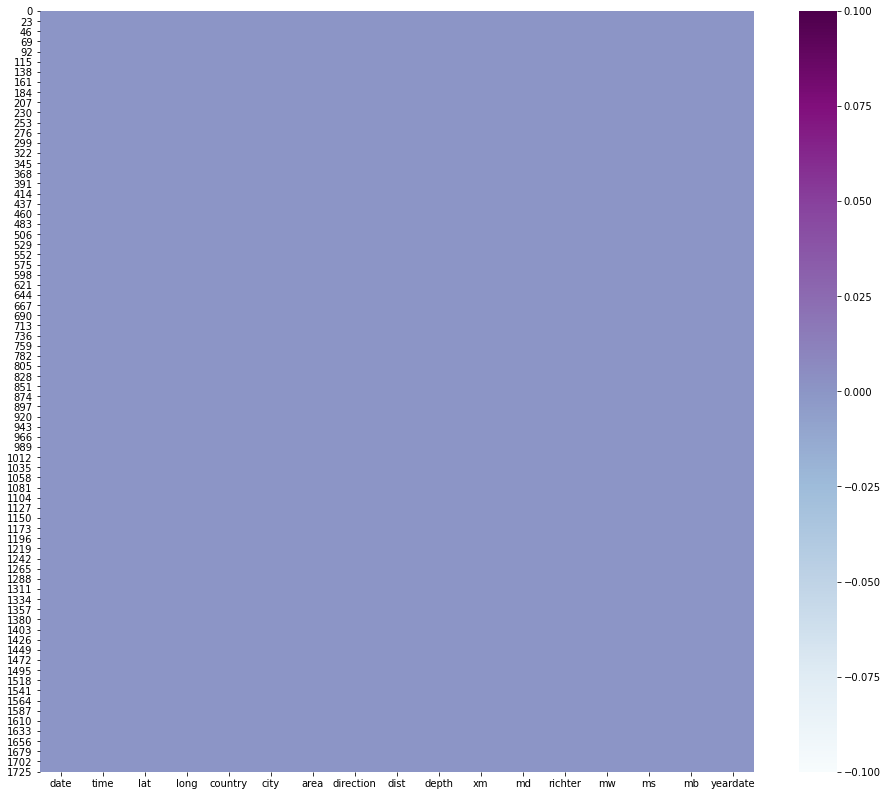

In [28]:
plt.figure(figsize=(16,14))
sns.heatmap (data.isnull(),cmap="BuPu")


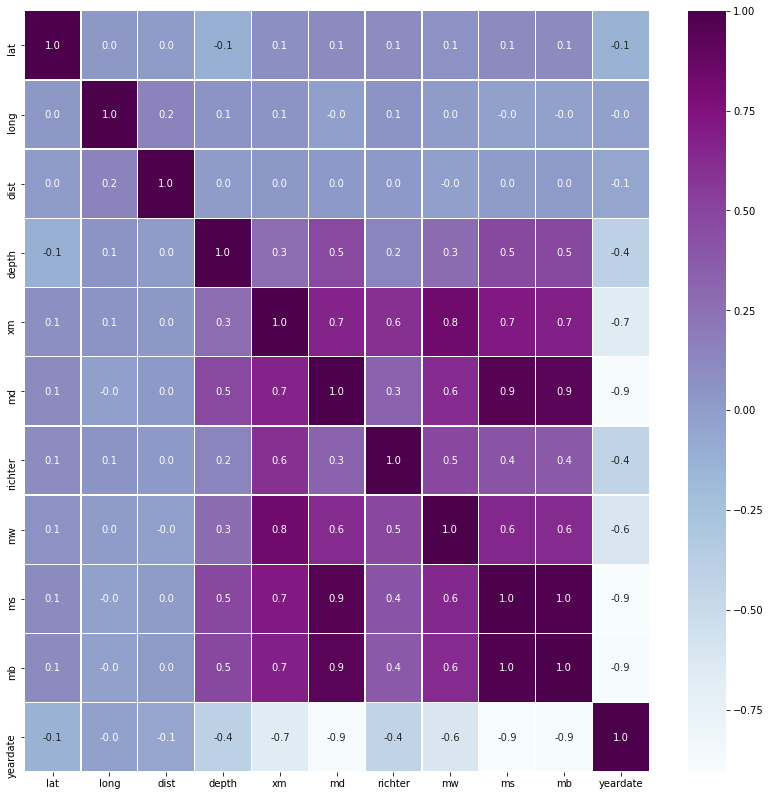

In [29]:
plt.figure(figsize=(14,14))
sns.heatmap(data.corr(), annot = True, fmt= ".1f", linewidths = .3,cmap="BuPu") 
plt.show()

In [30]:
def richter_trans(x):
    
    if x < 2.0:
        return "SMALLER"
    elif x < 4.0:
        return "LITTLE"
    elif x < 5.0:
        return "LIGHTER"
    elif x < 6.0:
        return "MEDIUM"
    elif x < 7.0:
        return "POWERFUL"
    elif x < 8.0:
        return "BIG"
    elif x < 9.0:
        return "GREAT"
    elif x >= 9.0:
        return "DIVASTATING"
    else:
        return "NO_RISK"

In [31]:
data["richter_thread"] = data["richter"].apply(lambda x: richter_trans(x))

In [32]:
data


,date,time,lat,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb,yeardate,richter_thread
0,1912.08.09,12:29:00 AM,40.60,27.20,turkey,tekirdag,eriklice_sarkoy,south_east,4.3,16.0,7.3,6.8,6.7,6.9,7.3,6.6,1912,POWERFUL
1,1912.08.10,12:30:00 AM,40.60,27.10,turkey,tekirdag,sarkoy,south_west,2.0,15.0,5.5,5.2,5.2,5.5,5.3,5.2,1912,MEDIUM
2,1912.08.10,12:23:00 AM,40.60,27.10,turkey,tekirdag,sarkoy,south_west,2.0,15.0,6.3,6.0,6.0,6.2,6.3,5.9,1912,POWERFUL
3,1912.08.11,12:19:04 AM,40.60,27.20,turkey,tekirdag,eriklice_sarkoy,south_east,4.3,30.0,5.3,5.0,4.9,5.3,5.0,5.0,1912,LIGHTER
4,1912.08.11,12:20:00 AM,40.60,27.10,turkey,tekirdag,sarkoy,south_west,2.0,15.0,4.6,4.5,4.5,4.6,4.4,4.6,1912,LIGHTER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1721,2017.07.26,12:50:05 AM,40.76,32.87,turkey,cankiri,turbasi_cerkes,south_east,2.1,5.0,3.9,0.0,3.7,3.9,0.0,0.0,2017,LITTLE
1722,2017.07.29,12:24:11 AM,37.12,28.59,turkey,mugla,aricilar_ula,north,0.5,5.0,4.0,0.0,3.9,4.0,0.0,0.0,2017,LITTLE
1723,2017.07.29,12:33:23 AM,37.11,27.73,turkey,mugla,beyciler_milas,north_east,1.2,6.5,3.5,0.0,3.5,3.4,0.0,0.0,2017,LITTLE
1724,2017.07.30,12:21:33 AM,37.39,31.37,turkey,konya,pinarbasi_derebucak,south_west,6.0,5.0,3.6,0.0,3.5,3.6,0.0,0.0,2017,LITTLE


In [33]:
data.info


<bound method DataFrame.info of             date         time    lat   long country      city  \
0     1912.08.09  12:29:00 AM  40.60  27.20  turkey  tekirdag   
1     1912.08.10  12:30:00 AM  40.60  27.10  turkey  tekirdag   
2     1912.08.10  12:23:00 AM  40.60  27.10  turkey  tekirdag   
3     1912.08.11  12:19:04 AM  40.60  27.20  turkey  tekirdag   
4     1912.08.11  12:20:00 AM  40.60  27.10  turkey  tekirdag   
...          ...          ...    ...    ...     ...       ...   
1721  2017.07.26  12:50:05 AM  40.76  32.87  turkey   cankiri   
1722  2017.07.29  12:24:11 AM  37.12  28.59  turkey     mugla   
1723  2017.07.29  12:33:23 AM  37.11  27.73  turkey     mugla   
1724  2017.07.30  12:21:33 AM  37.39  31.37  turkey     konya   
1725  2017.07.31  12:11:31 AM  37.42  31.37  turkey     konya   

                     area   direction  dist  depth   xm   md  richter   mw  \
0         eriklice_sarkoy  south_east   4.3   16.0  7.3  6.8      6.7  6.9   
1                  sarkoy  sout

In [34]:
data["time"] = pd.to_datetime(data["time"])

 

 
data["Year"] = data["time"].dt.year

data["Month"] = data["time"].dt.month

data["Weekday"] = data["time"].dt.weekday

data["Day"] = data["time"].dt.day

 

data["Hour"] = data["time"].dt.hour

data["Minute"] = data["time"].dt.minute

 

data.head()

,date,time,lat,long,country,city,area,direction,dist,depth,...,ms,mb,yeardate,richter_thread,Year,Month,Weekday,Day,Hour,Minute
0,1912.08.09,2022-04-26 00:29:00,40.6,27.2,turkey,tekirdag,eriklice_sarkoy,south_east,4.3,16.0,...,7.3,6.6,1912,POWERFUL,2022,4,1,26,0,29
1,1912.08.10,2022-04-26 00:30:00,40.6,27.1,turkey,tekirdag,sarkoy,south_west,2.0,15.0,...,5.3,5.2,1912,MEDIUM,2022,4,1,26,0,30
2,1912.08.10,2022-04-26 00:23:00,40.6,27.1,turkey,tekirdag,sarkoy,south_west,2.0,15.0,...,6.3,5.9,1912,POWERFUL,2022,4,1,26,0,23
3,1912.08.11,2022-04-26 00:19:04,40.6,27.2,turkey,tekirdag,eriklice_sarkoy,south_east,4.3,30.0,...,5.0,5.0,1912,LIGHTER,2022,4,1,26,0,19
4,1912.08.11,2022-04-26 00:20:00,40.6,27.1,turkey,tekirdag,sarkoy,south_west,2.0,15.0,...,4.4,4.6,1912,LIGHTER,2022,4,1,26,0,20


We have possitive correlation **xm** between as **mw**, **ms** and **mb**


In [35]:
print("RISK:\n")
print(data["richter_thread"].value_counts())

RISK:

LIGHTER     1102
LITTLE       284
MEDIUM       271
SMALLER       37
POWERFUL      29
BIG            3
Name: richter_thread, dtype: int64


In [36]:
print("BIG\n")
print(data[data["richter_thread"] == "BIG"])

BIG

           date                time    lat   long country      city  \
222  1939.12.26 2022-04-26 00:57:21  39.80  39.51  turkey  erzincan   
526  1964.10.06 2022-04-26 00:31:23  40.30  28.23  turkey     bursa   
808  1970.03.28 2022-04-26 00:02:23  39.21  29.51  turkey   kutahya   

                  area   direction  dist  depth  ...   ms   mb  yeardate  \
222          kurutilek  north_east   3.0   20.0  ...  7.9  7.1      1939   
526  okcular_karacabey  north_east   1.5   34.0  ...  7.0  6.0      1964   
808  kizik_cavdarhisar       north   0.8   18.0  ...  7.0  6.0      1970   

     richter_thread  Year  Month  Weekday Day  Hour  Minute  
222             BIG  2022      4        1  26     0      57  
526             BIG  2022      4        1  26     0      31  
808             BIG  2022      4        1  26     0       2  

[3 rows x 24 columns]


In [37]:
print(data[data["richter_thread"] == "BIG"]["city"])


222    erzincan
526       bursa
808     kutahya
Name: city, dtype: object


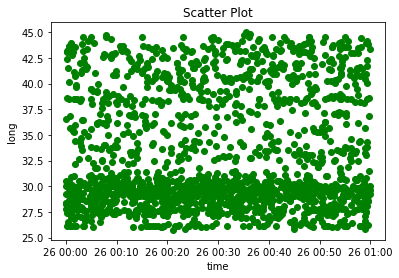

In [38]:

plt.scatter(data['time'], data['long'],color="green")  
plt.title("Scatter Plot")
plt.xlabel('time')
plt.ylabel('long')  
plt.show()

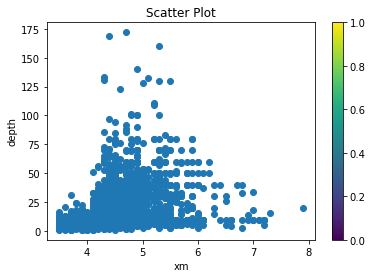

In [39]:
import pandas as pd
import matplotlib.pyplot as plt





plt.scatter(data['xm'], data['depth'])


plt.title("Scatter Plot")


plt.xlabel('xm')
plt.ylabel('depth')

plt.colorbar()

plt.show()

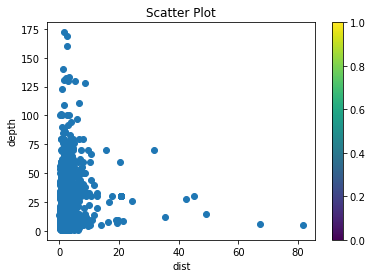

In [40]:
import pandas as pd
import matplotlib.pyplot as plt






plt.scatter(data['dist'], data['depth'])


plt.title("Scatter Plot")


plt.xlabel('dist')
plt.ylabel('depth')

plt.colorbar()

plt.show()

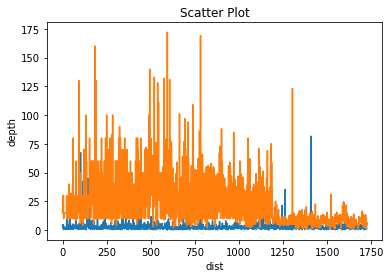

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

plt.plot(data['dist'])
plt.plot(data['depth'])
plt.title("Scatter Plot")
plt.xlabel('dist')
plt.ylabel('depth')

plt.show()


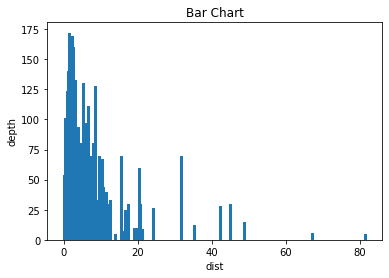

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

plt.bar(data['dist'], data['depth'])
plt.title("Bar Chart")
plt.xlabel('dist')
plt.ylabel('depth')
plt.show()

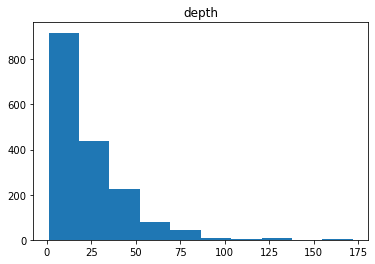

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

plt.hist(data['depth'])
plt.title("depth")
plt.show()

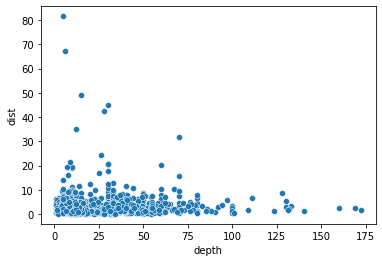

In [44]:

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd




sns.scatterplot(x='depth', y='dist', data=data,)
plt.show()

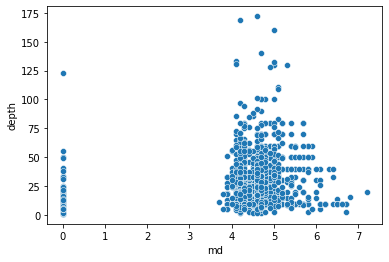

In [45]:

sns.scatterplot(x='md', y='depth',data=data)
plt.show()

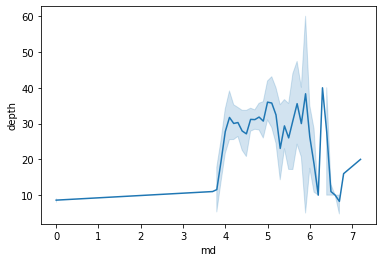

In [46]:
sns.lineplot(x='md', y='depth', data=data)
plt.show()

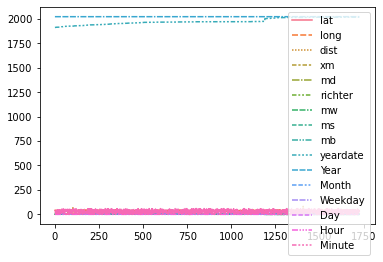

In [47]:
sns.lineplot(data=data.drop(['depth'], axis=1))
plt.show()

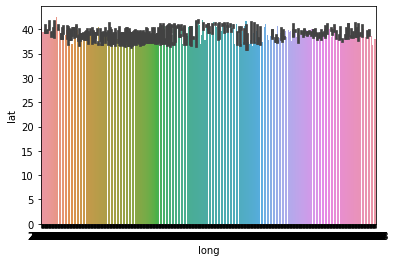

In [48]:
sns.barplot(x='long',y='lat', data=data)  
plt.show()

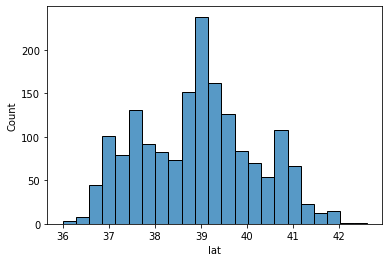

In [49]:
sns.histplot(x='lat', data=data,)
  
plt.show()

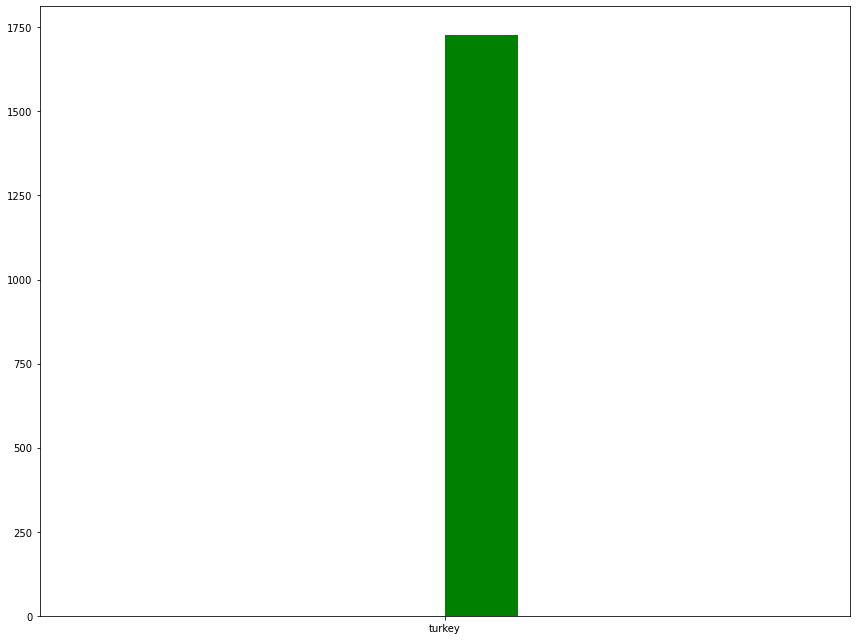

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(12,9))
    
plt.hist(x=data["country"], color="green")
plt.title("")
    
plt.tight_layout()
plt.show()

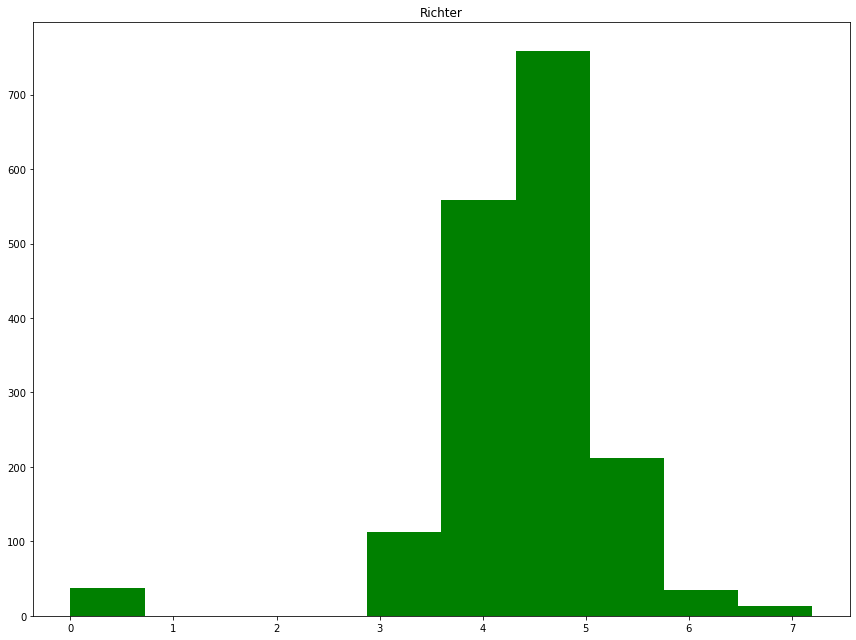

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(12,9))
    
plt.hist(x=data["richter"], color="green")
plt.title("Richter")
    
plt.tight_layout()
plt.show()

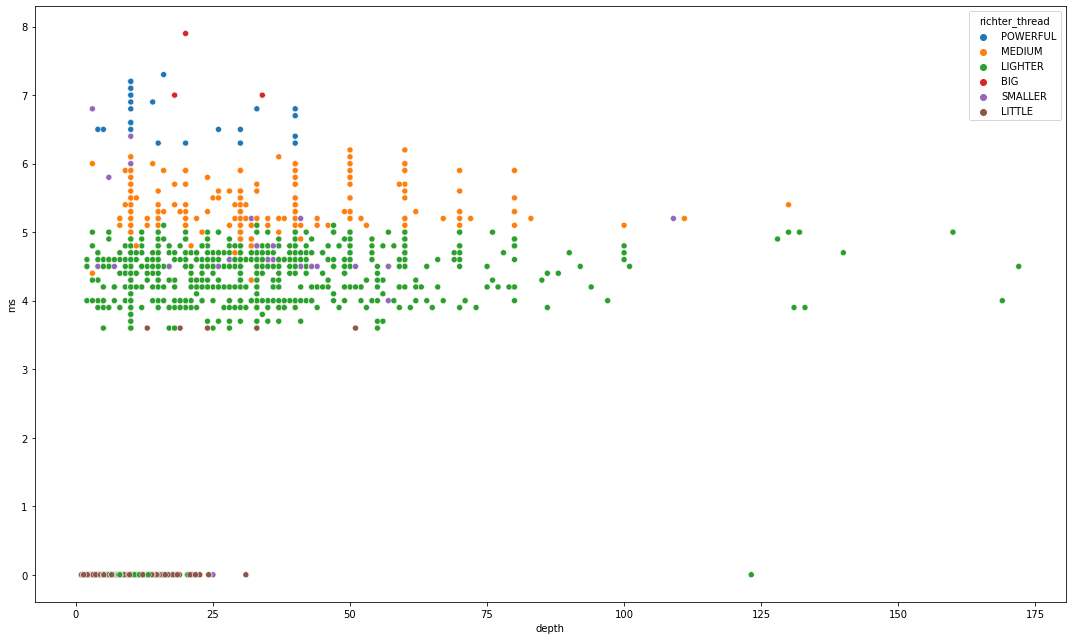

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(15,9))
    
sns.scatterplot(x=data["depth"],y=data["ms"],hue=data["richter_thread"])
plt.title("")
    
plt.tight_layout()
plt.show()

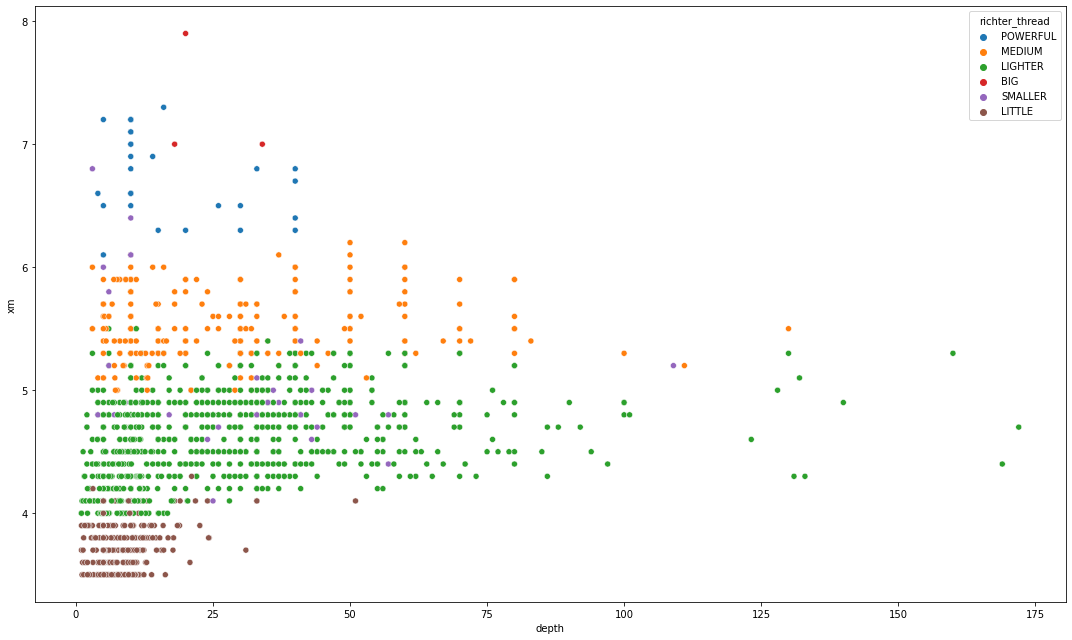

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(15,9))
    
sns.scatterplot(x=data["depth"],y=data["xm"],hue=data["richter_thread"])
plt.title("")
    
plt.tight_layout()
plt.show()

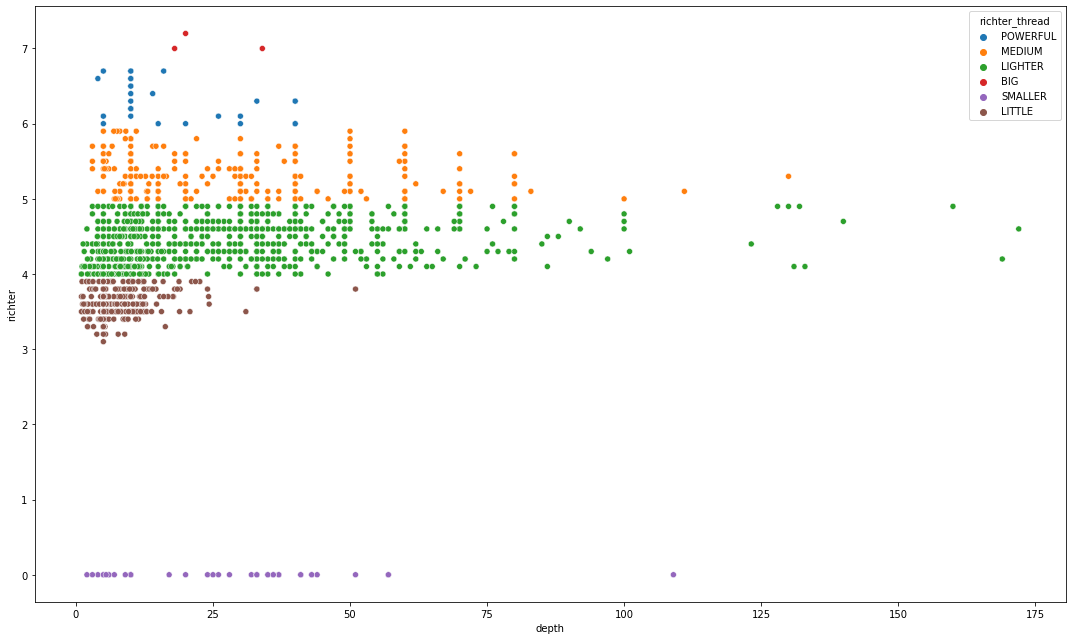

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(15,9))
    
sns.scatterplot(x=data["depth"],y=data["richter"],hue=data["richter_thread"])
plt.title("")
    
plt.tight_layout()
plt.show()

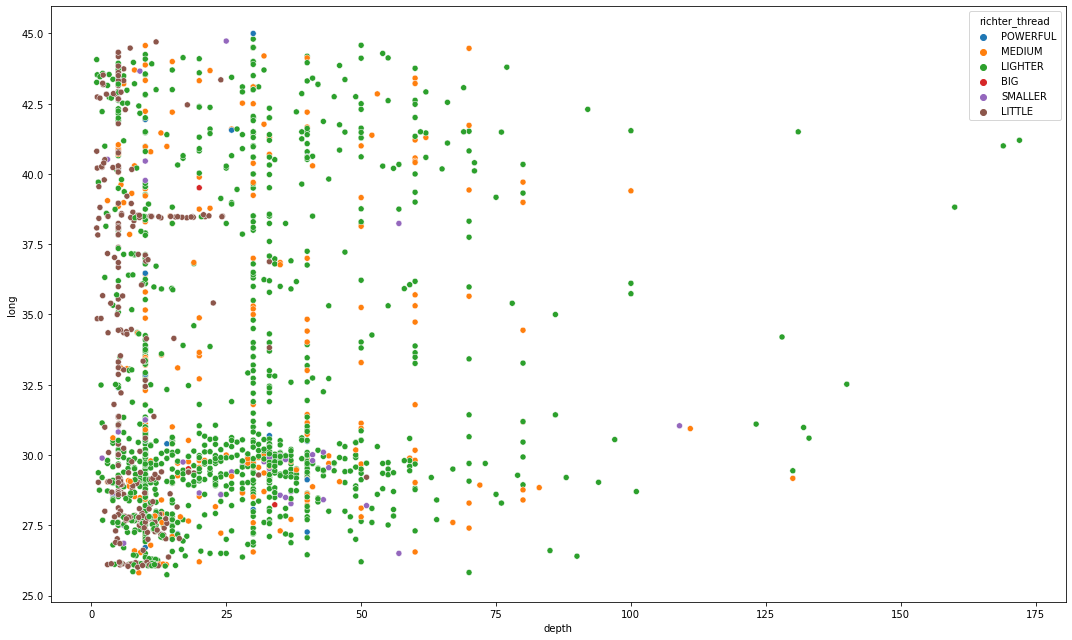

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(15,9))
    
sns.scatterplot(x=data["depth"],y=data["long"],hue=data["richter_thread"])
plt.title("")
    
plt.tight_layout()
plt.show()

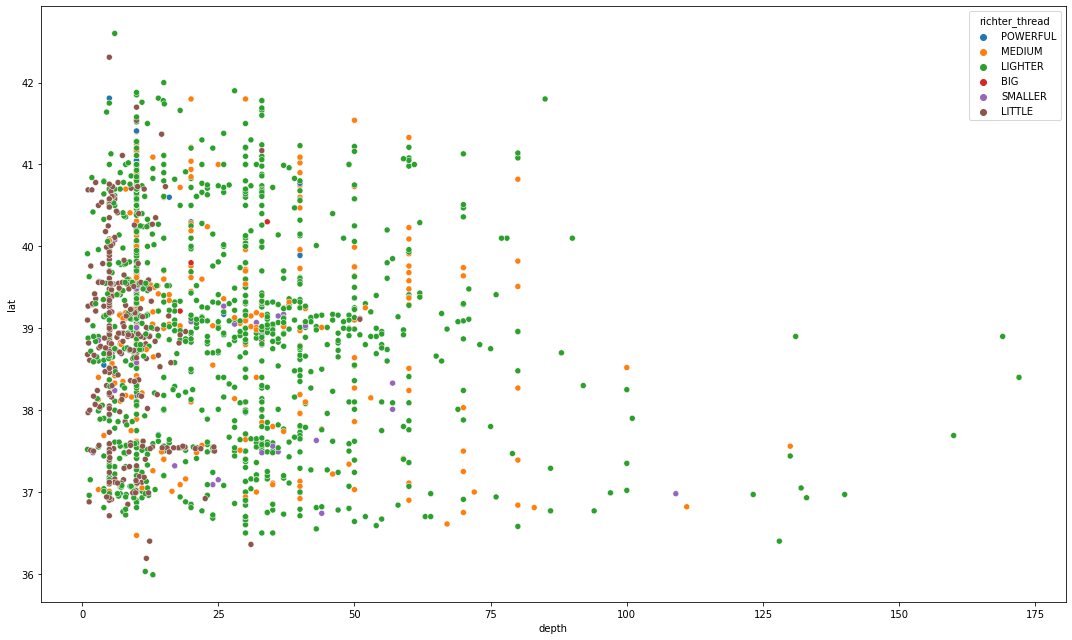

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(15,9))
    
sns.scatterplot(x=data["depth"],y=data["lat"],hue=data["richter_thread"])
plt.title("")
    
plt.tight_layout()
plt.show()

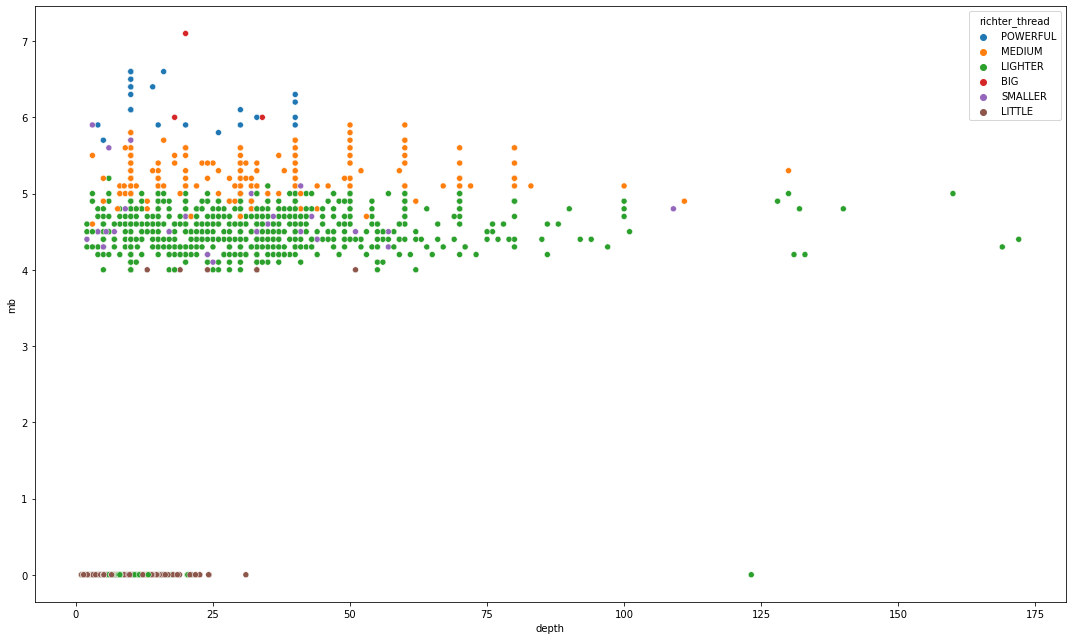

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(15,9))
    
sns.scatterplot(x=data["depth"],y=data["mb"],hue=data["richter_thread"])
plt.title("")
    
plt.tight_layout()
plt.show()

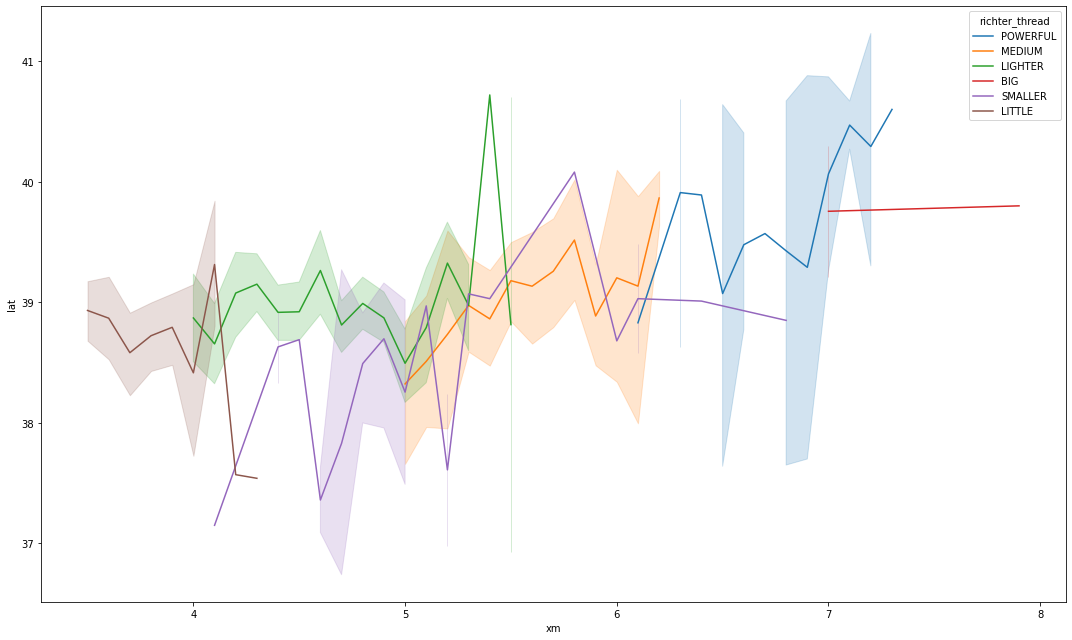

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(15,9))
    
sns.lineplot(x=data["xm"],y=data["lat"],hue=data["richter_thread"])
plt.title("")
    
plt.tight_layout()
plt.show()

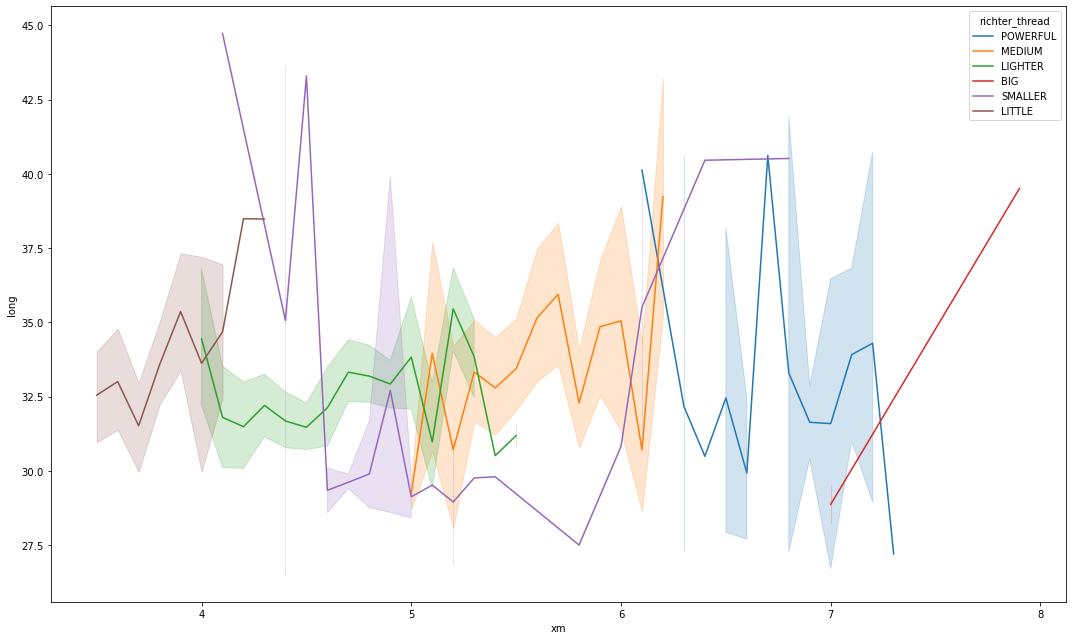

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(15,9))
    
sns.lineplot(x=data["xm"],y=data["long"],hue=data["richter_thread"])
plt.title("")
    
plt.tight_layout()
plt.show()

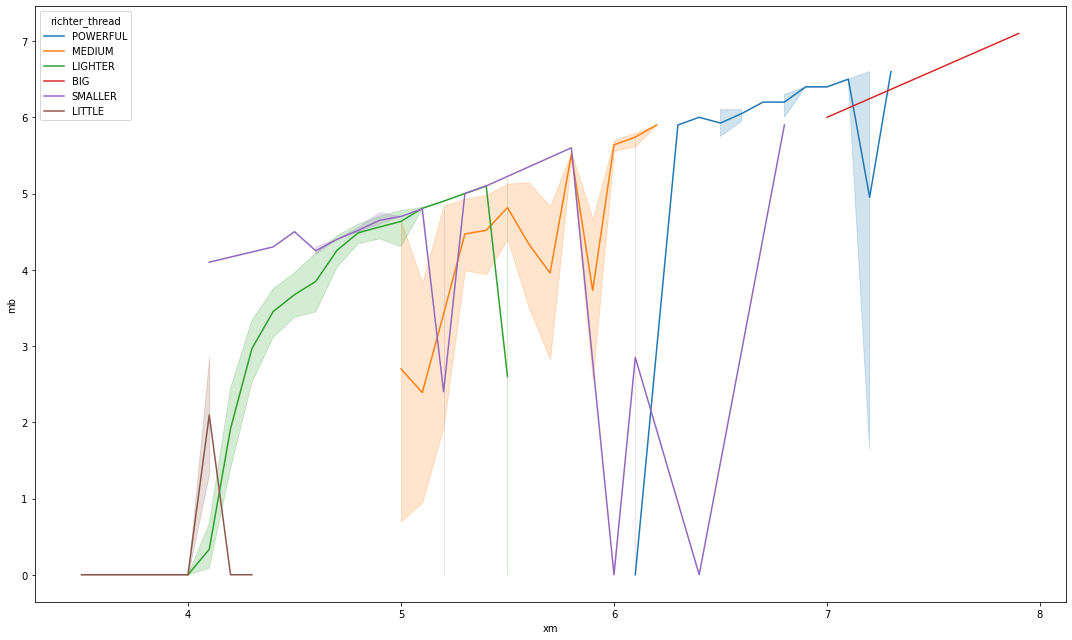

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(15,9))
    
sns.lineplot(x=data["xm"],y=data["mb"],hue=data["richter_thread"])
plt.title("")
    
plt.tight_layout()
plt.show()

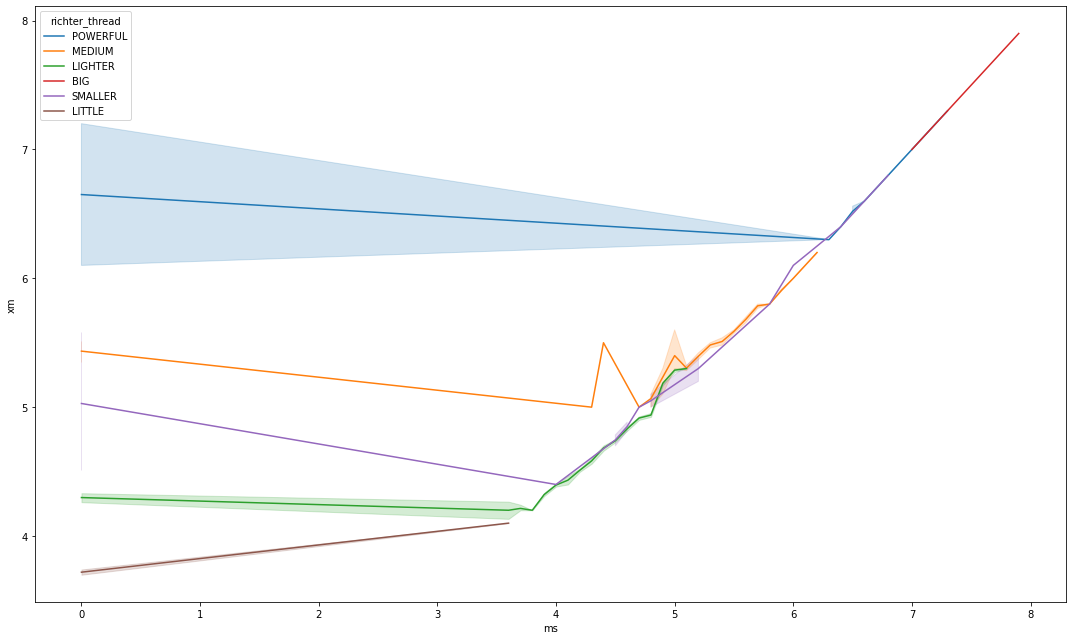

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(15,9))
    
sns.lineplot(x=data["ms"],y=data["xm"],hue=data["richter_thread"])
plt.title("")
    
plt.tight_layout()
plt.show()

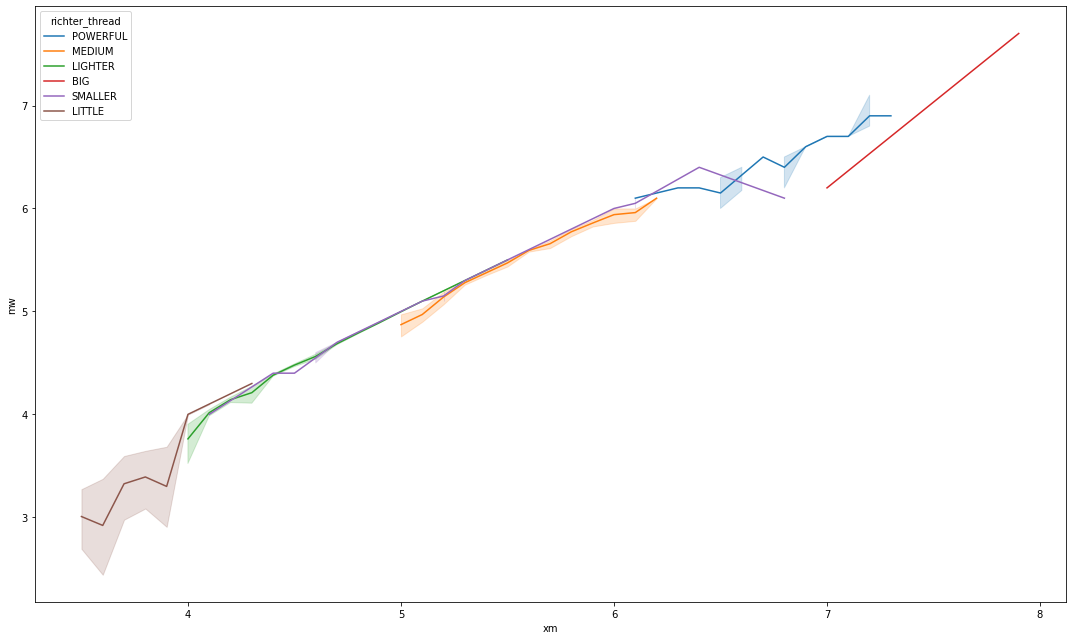

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(15,9))
    
sns.lineplot(x=data["xm"],y=data["mw"],hue=data["richter_thread"])
plt.title("")
    
plt.tight_layout()
plt.show()

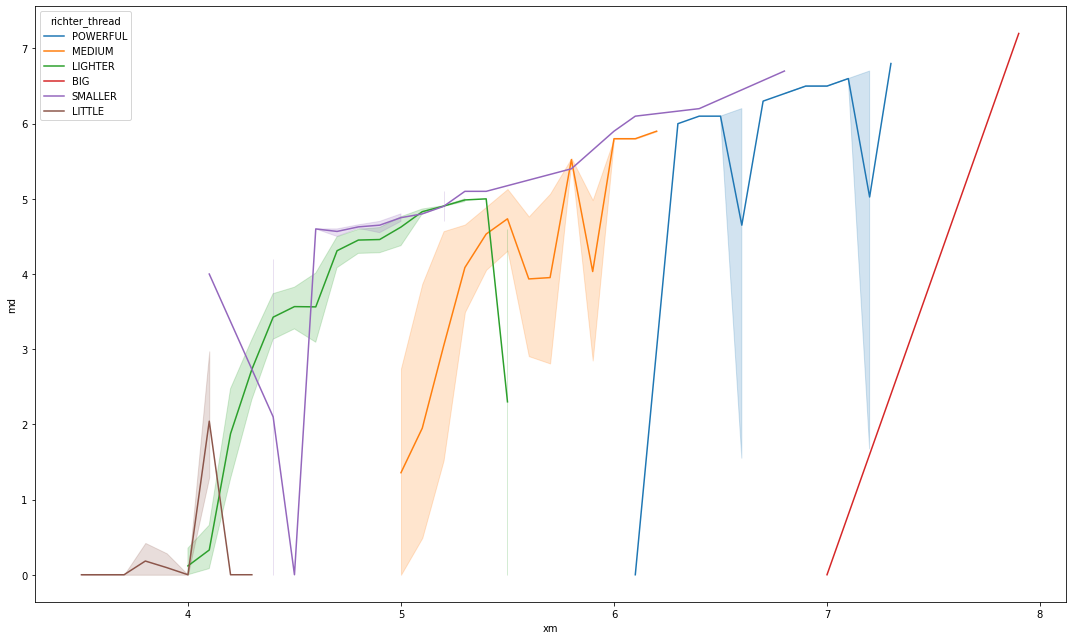

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(15,9))
    
sns.lineplot(x=data["xm"],y=data["md"],hue=data["richter_thread"])
plt.title("")
    
plt.tight_layout()
plt.show()

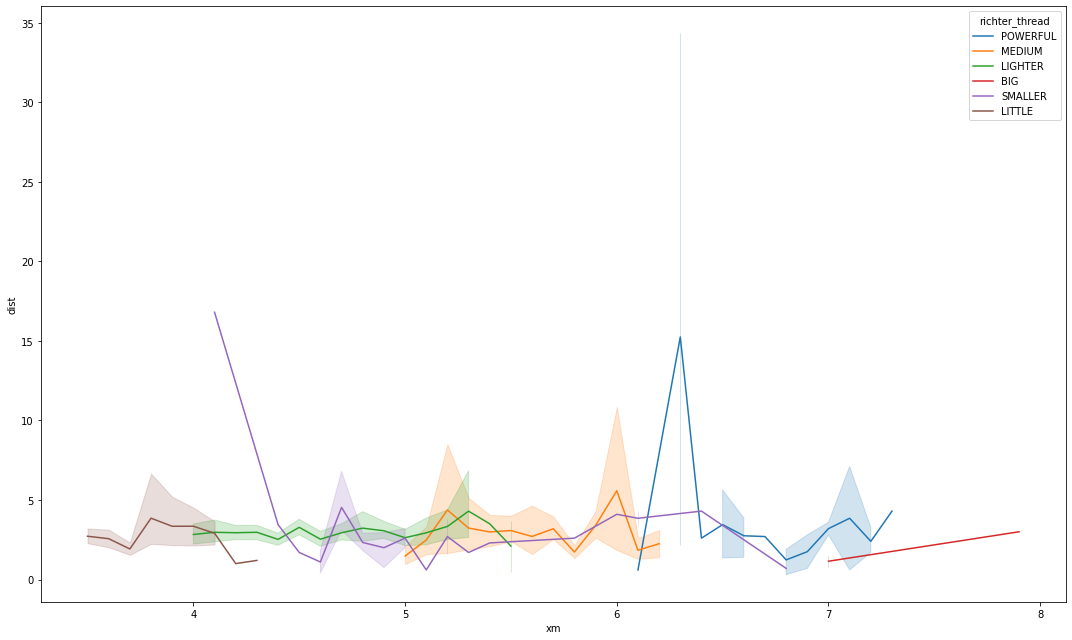

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(15,9))
    
sns.lineplot(x=data["xm"],y=data["dist"],hue=data["richter_thread"])
plt.title("")
    
plt.tight_layout()
plt.show()

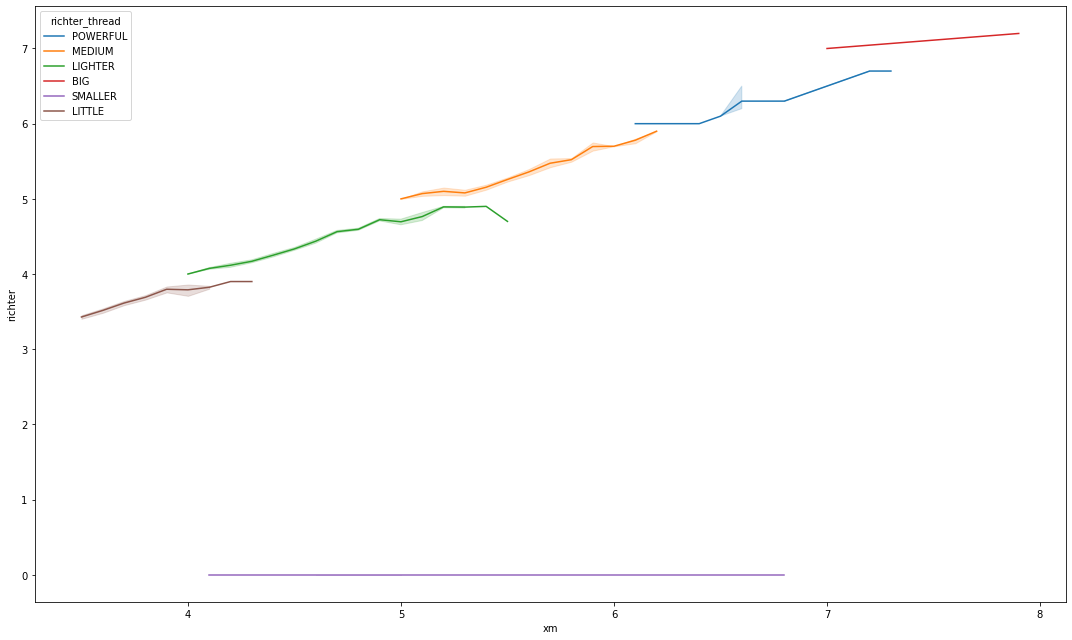

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(15,9))
    
sns.lineplot(x=data["xm"],y=data["richter"],hue=data["richter_thread"])
plt.title("")
    
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'BIG-CITY')

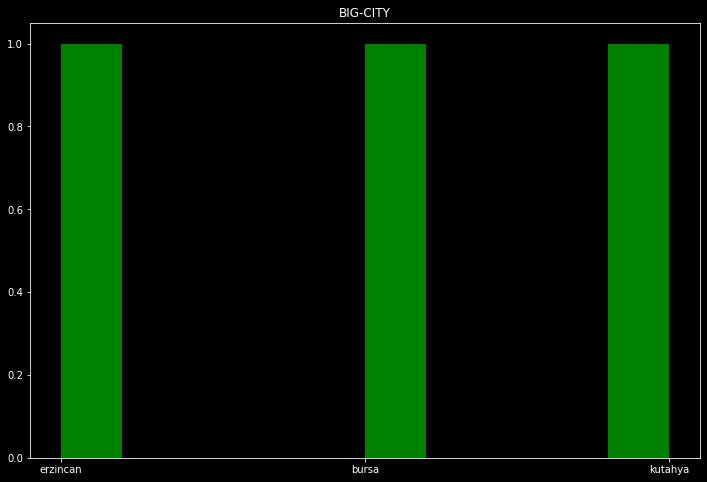

In [66]:
plt.style.use("dark_background")

figure = plt.figure(figsize=(12,8))

plt.hist(data[data["richter_thread"] == "BIG"]["city"],color="green")
plt.title("BIG-CITY")

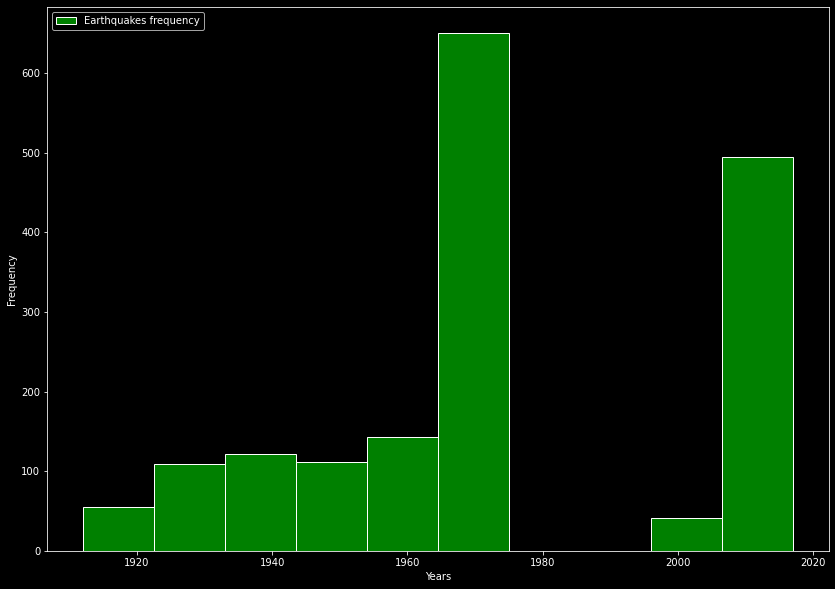

In [67]:
data.yeardate.plot(kind = "hist" , color = "green" , edgecolor="white",  
                   figsize = (14,10) , label = "Earthquakes frequency")
plt.legend(loc = "upper left")
plt.xlabel("Years")
plt.show()

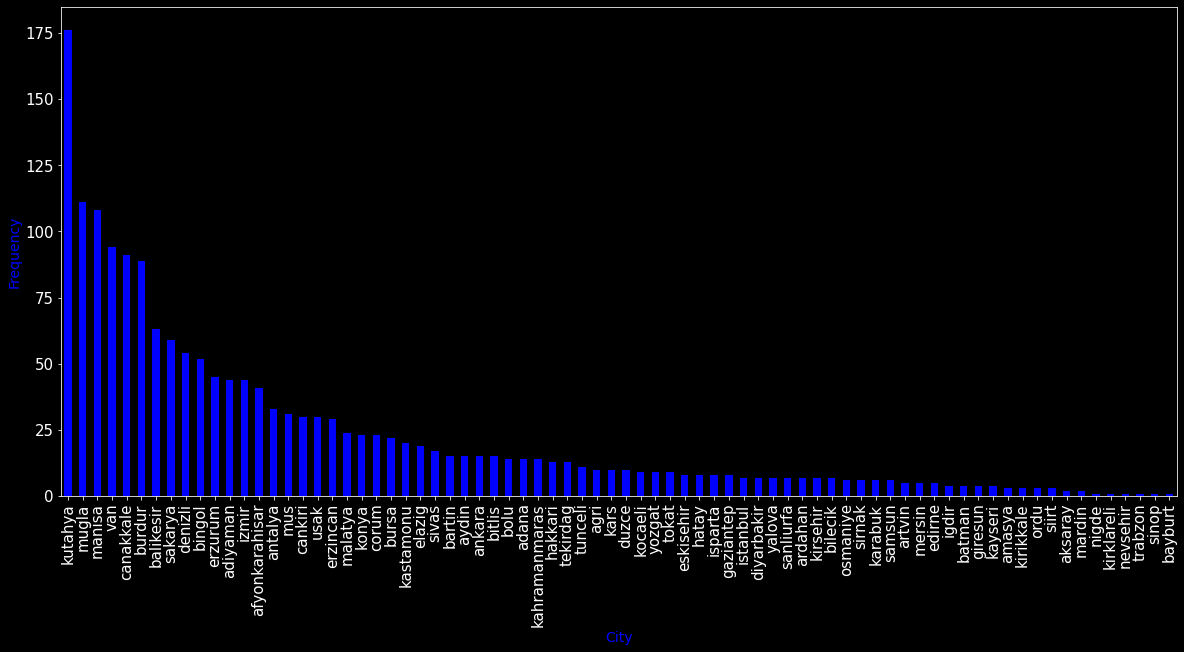

In [68]:
data.city.value_counts().plot(kind = "bar" , color = "blue" , figsize = (20,9),fontsize = 15)
plt.xlabel("City",fontsize=14,color="blue")
plt.ylabel("Frequency",fontsize=14,color="blue")
plt.show()

In [69]:
Data1 = data[["depth","yeardate","Month","Weekday","Day","Hour","Minute","xm","md","richter","mw","ms","mb","richter_thread"]]

In [70]:
Data1

,depth,yeardate,Month,Weekday,Day,Hour,Minute,xm,md,richter,mw,ms,mb,richter_thread
0,16.0,1912,4,1,26,0,29,7.3,6.8,6.7,6.9,7.3,6.6,POWERFUL
1,15.0,1912,4,1,26,0,30,5.5,5.2,5.2,5.5,5.3,5.2,MEDIUM
2,15.0,1912,4,1,26,0,23,6.3,6.0,6.0,6.2,6.3,5.9,POWERFUL
3,30.0,1912,4,1,26,0,19,5.3,5.0,4.9,5.3,5.0,5.0,LIGHTER
4,15.0,1912,4,1,26,0,20,4.6,4.5,4.5,4.6,4.4,4.6,LIGHTER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1721,5.0,2017,4,1,26,0,50,3.9,0.0,3.7,3.9,0.0,0.0,LITTLE
1722,5.0,2017,4,1,26,0,24,4.0,0.0,3.9,4.0,0.0,0.0,LITTLE
1723,6.5,2017,4,1,26,0,33,3.5,0.0,3.5,3.4,0.0,0.0,LITTLE
1724,5.0,2017,4,1,26,0,21,3.6,0.0,3.5,3.6,0.0,0.0,LITTLE


In [71]:
Data1.isna().sum()

depth             0
yeardate          0
Month             0
Weekday           0
Day               0
Hour              0
Minute            0
xm                0
md                0
richter           0
mw                0
ms                0
mb                0
richter_thread    0
dtype: int64

In [72]:
from sklearn.preprocessing import OneHotEncoder 
encoder = OneHotEncoder(drop='first',dtype=np.int64)
dfn = Data1[['richter_thread']] 
dfn = encoder.fit_transform(dfn).toarray()
dfn = pd.DataFrame(dfn,columns=['POWERFUL','MEDIUM','LIGHTER','LITTLE','BIG'])
Data1 = pd.concat([data,dfn],axis=1)
Data1

,date,time,lat,long,country,city,area,direction,dist,depth,...,Month,Weekday,Day,Hour,Minute,POWERFUL,MEDIUM,LIGHTER,LITTLE,BIG
0,1912.08.09,2022-04-26 00:29:00,40.60,27.20,turkey,tekirdag,eriklice_sarkoy,south_east,4.3,16.0,...,4,1,26,0,29,0,0,0,1,0
1,1912.08.10,2022-04-26 00:30:00,40.60,27.10,turkey,tekirdag,sarkoy,south_west,2.0,15.0,...,4,1,26,0,30,0,0,1,0,0
2,1912.08.10,2022-04-26 00:23:00,40.60,27.10,turkey,tekirdag,sarkoy,south_west,2.0,15.0,...,4,1,26,0,23,0,0,0,1,0
3,1912.08.11,2022-04-26 00:19:04,40.60,27.20,turkey,tekirdag,eriklice_sarkoy,south_east,4.3,30.0,...,4,1,26,0,19,1,0,0,0,0
4,1912.08.11,2022-04-26 00:20:00,40.60,27.10,turkey,tekirdag,sarkoy,south_west,2.0,15.0,...,4,1,26,0,20,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1721,2017.07.26,2022-04-26 00:50:05,40.76,32.87,turkey,cankiri,turbasi_cerkes,south_east,2.1,5.0,...,4,1,26,0,50,0,1,0,0,0
1722,2017.07.29,2022-04-26 00:24:11,37.12,28.59,turkey,mugla,aricilar_ula,north,0.5,5.0,...,4,1,26,0,24,0,1,0,0,0
1723,2017.07.29,2022-04-26 00:33:23,37.11,27.73,turkey,mugla,beyciler_milas,north_east,1.2,6.5,...,4,1,26,0,33,0,1,0,0,0
1724,2017.07.30,2022-04-26 00:21:33,37.39,31.37,turkey,konya,pinarbasi_derebucak,south_west,6.0,5.0,...,4,1,26,0,21,0,1,0,0,0


In [73]:
data

,date,time,lat,long,country,city,area,direction,dist,depth,...,ms,mb,yeardate,richter_thread,Year,Month,Weekday,Day,Hour,Minute
0,1912.08.09,2022-04-26 00:29:00,40.60,27.20,turkey,tekirdag,eriklice_sarkoy,south_east,4.3,16.0,...,7.3,6.6,1912,POWERFUL,2022,4,1,26,0,29
1,1912.08.10,2022-04-26 00:30:00,40.60,27.10,turkey,tekirdag,sarkoy,south_west,2.0,15.0,...,5.3,5.2,1912,MEDIUM,2022,4,1,26,0,30
2,1912.08.10,2022-04-26 00:23:00,40.60,27.10,turkey,tekirdag,sarkoy,south_west,2.0,15.0,...,6.3,5.9,1912,POWERFUL,2022,4,1,26,0,23
3,1912.08.11,2022-04-26 00:19:04,40.60,27.20,turkey,tekirdag,eriklice_sarkoy,south_east,4.3,30.0,...,5.0,5.0,1912,LIGHTER,2022,4,1,26,0,19
4,1912.08.11,2022-04-26 00:20:00,40.60,27.10,turkey,tekirdag,sarkoy,south_west,2.0,15.0,...,4.4,4.6,1912,LIGHTER,2022,4,1,26,0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1721,2017.07.26,2022-04-26 00:50:05,40.76,32.87,turkey,cankiri,turbasi_cerkes,south_east,2.1,5.0,...,0.0,0.0,2017,LITTLE,2022,4,1,26,0,50
1722,2017.07.29,2022-04-26 00:24:11,37.12,28.59,turkey,mugla,aricilar_ula,north,0.5,5.0,...,0.0,0.0,2017,LITTLE,2022,4,1,26,0,24
1723,2017.07.29,2022-04-26 00:33:23,37.11,27.73,turkey,mugla,beyciler_milas,north_east,1.2,6.5,...,0.0,0.0,2017,LITTLE,2022,4,1,26,0,33
1724,2017.07.30,2022-04-26 00:21:33,37.39,31.37,turkey,konya,pinarbasi_derebucak,south_west,6.0,5.0,...,0.0,0.0,2017,LITTLE,2022,4,1,26,0,21


In [74]:
Data1.drop(['date', 'time','area','direction','richter_thread','country','city'],axis=1,inplace=True)
Data1

,lat,long,dist,depth,xm,md,richter,mw,ms,mb,...,Month,Weekday,Day,Hour,Minute,POWERFUL,MEDIUM,LIGHTER,LITTLE,BIG
0,40.60,27.20,4.3,16.0,7.3,6.8,6.7,6.9,7.3,6.6,...,4,1,26,0,29,0,0,0,1,0
1,40.60,27.10,2.0,15.0,5.5,5.2,5.2,5.5,5.3,5.2,...,4,1,26,0,30,0,0,1,0,0
2,40.60,27.10,2.0,15.0,6.3,6.0,6.0,6.2,6.3,5.9,...,4,1,26,0,23,0,0,0,1,0
3,40.60,27.20,4.3,30.0,5.3,5.0,4.9,5.3,5.0,5.0,...,4,1,26,0,19,1,0,0,0,0
4,40.60,27.10,2.0,15.0,4.6,4.5,4.5,4.6,4.4,4.6,...,4,1,26,0,20,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1721,40.76,32.87,2.1,5.0,3.9,0.0,3.7,3.9,0.0,0.0,...,4,1,26,0,50,0,1,0,0,0
1722,37.12,28.59,0.5,5.0,4.0,0.0,3.9,4.0,0.0,0.0,...,4,1,26,0,24,0,1,0,0,0
1723,37.11,27.73,1.2,6.5,3.5,0.0,3.5,3.4,0.0,0.0,...,4,1,26,0,33,0,1,0,0,0
1724,37.39,31.37,6.0,5.0,3.6,0.0,3.5,3.6,0.0,0.0,...,4,1,26,0,21,0,1,0,0,0


In [75]:
Data1.duplicated().sum()

2

In [76]:
Data1.drop_duplicates()

,lat,long,dist,depth,xm,md,richter,mw,ms,mb,...,Month,Weekday,Day,Hour,Minute,POWERFUL,MEDIUM,LIGHTER,LITTLE,BIG
0,40.60,27.20,4.3,16.0,7.3,6.8,6.7,6.9,7.3,6.6,...,4,1,26,0,29,0,0,0,1,0
1,40.60,27.10,2.0,15.0,5.5,5.2,5.2,5.5,5.3,5.2,...,4,1,26,0,30,0,0,1,0,0
2,40.60,27.10,2.0,15.0,6.3,6.0,6.0,6.2,6.3,5.9,...,4,1,26,0,23,0,0,0,1,0
3,40.60,27.20,4.3,30.0,5.3,5.0,4.9,5.3,5.0,5.0,...,4,1,26,0,19,1,0,0,0,0
4,40.60,27.10,2.0,15.0,4.6,4.5,4.5,4.6,4.4,4.6,...,4,1,26,0,20,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1721,40.76,32.87,2.1,5.0,3.9,0.0,3.7,3.9,0.0,0.0,...,4,1,26,0,50,0,1,0,0,0
1722,37.12,28.59,0.5,5.0,4.0,0.0,3.9,4.0,0.0,0.0,...,4,1,26,0,24,0,1,0,0,0
1723,37.11,27.73,1.2,6.5,3.5,0.0,3.5,3.4,0.0,0.0,...,4,1,26,0,33,0,1,0,0,0
1724,37.39,31.37,6.0,5.0,3.6,0.0,3.5,3.6,0.0,0.0,...,4,1,26,0,21,0,1,0,0,0


In [77]:
x = Data1.drop("LIGHTER",axis=1)
y = Data1.LIGHTER

In [78]:
from sklearn.model_selection import train_test_split  
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)


In [79]:
x_train.shape

(1380, 21)

In [80]:
x.shape

(1726, 21)

In [81]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [82]:
from sklearn.linear_model import LinearRegression 
linear=LinearRegression()

In [83]:
linear.fit(x_train,y_train) 

LinearRegression()

In [84]:
data=linear.score(x_test,y_test)  
print(data)
data=linear.score(x_train,y_train) 
print(data)


0.9971918633167118
0.9870447277263907


In [85]:
from sklearn.metrics import mean_squared_error

In [86]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(linear,x,y,cv=10,scoring='r2')
print(scores)
print("{:.3f}".format(scores.mean()))

[0.99887587 0.97850936 0.99870828 0.95614809 0.93604258 0.99395515
 0.98534429 0.99398319 0.98533729 0.99720388]
0.982


In [87]:
from sklearn.neural_network import MLPClassifier
model1 = MLPClassifier(random_state=0)
model1.fit(x_train,y_train)

train_score = model1.score(x_train,y_train)
test_score = model1.score(x_test,y_test)
print("Training accuracy:{:.3f}".format(train_score))
print("Testing accuracy: {:.3f}".format(test_score))


Training accuracy:0.867
Testing accuracy: 0.855


In [88]:

y_test_predictor = model1.predict(x_test)
print(classification_report (y_train, model1.predict(x_train)))
print(classification_report(y_test, y_test_predictor ))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93      1159
           1       0.80      0.23      0.36       221

    accuracy                           0.87      1380
   macro avg       0.83      0.61      0.64      1380
weighted avg       0.86      0.87      0.84      1380

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       296
           1       0.50      0.10      0.17        50

    accuracy                           0.86       346
   macro avg       0.68      0.54      0.54       346
weighted avg       0.81      0.86      0.81       346



In [89]:
ml=mean_squared_error(y_test_predictor,y_test)
rmse=np.sqrt(ml)
print("Mean Square Error: "+str(ml)+" Root Means Square Error: "+str(rmse)+"  mlp")

Mean Square Error: 0.14450867052023122 Root Means Square Error: 0.38014296063485276  mlp


[[291   5]
 [ 45   5]]


Text(33.0, 0.5, 'Actuals')

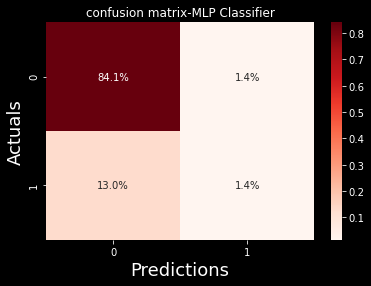

In [90]:

y_test_predictor = model1.predict(x_test)
confusion = confusion_matrix(y_test,y_test_predictor)  
print(confusion)

sns.heatmap(confusion/np.sum(confusion), annot = True, cmap="Reds", fmt=".1%" )
plt.title("confusion matrix-MLP Classifier")
plt.show
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)

<AxesSubplot:>

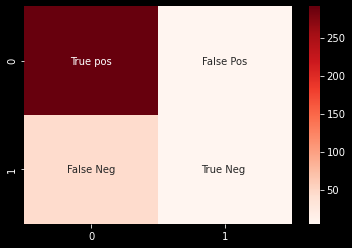

In [91]:
labels =["True pos", "False Pos", "False Neg", "True Neg "] 
labels = np.array(labels).reshape(2,2)
sns.heatmap(confusion, annot=labels, cmap="Reds", fmt="")


In [92]:
from sklearn.neighbors import KNeighborsClassifier
model2= KNeighborsClassifier() 
model2.fit(x_train,y_train)
y_test_pred = model2.predict(x_test)
training = model2.score(x_train, y_train)
print("Training accuracy:{:.3f}".format(training))
testing = model2.score(x_test, y_test)
print("Testing accuracy:{:.3f}".format(testing))

Training accuracy:0.875
Testing accuracy:0.841


In [93]:
y_test_pd = model2.predict(x_test)
print(classification_report (y_train, model2.predict(x_train)))
print(classification_report(y_test, y_test_pd ))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1159
           1       0.72      0.36      0.48       221

    accuracy                           0.87      1380
   macro avg       0.80      0.67      0.70      1380
weighted avg       0.86      0.87      0.86      1380

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       296
           1       0.41      0.22      0.29        50

    accuracy                           0.84       346
   macro avg       0.64      0.58      0.60       346
weighted avg       0.81      0.84      0.82       346



In [94]:
kn=mean_squared_error(y_test_pd,y_test)
rmse=np.sqrt(kn)
print("Mean Square Error: "+str(kn)+" Root Means Square Error: "+str(rmse)+"knn")

Mean Square Error: 0.15895953757225434 Root Means Square Error: 0.3986973006834312knn


[[280  16]
 [ 39  11]]


Text(33.0, 0.5, 'Actuals')

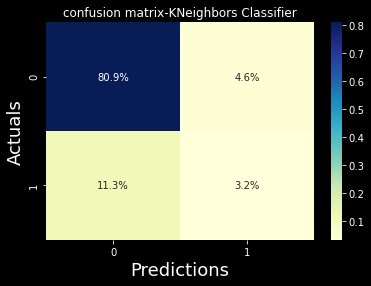

In [95]:

y_test_pd = model2.predict(x_test)
confusion = confusion_matrix(y_test,y_test_pd)  
print(confusion)

sns.heatmap(confusion/np.sum(confusion), annot = True, cmap="YlGnBu", fmt=".1%" )
plt.title("confusion matrix-KNeighbors Classifier")
plt.show
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)

<AxesSubplot:>

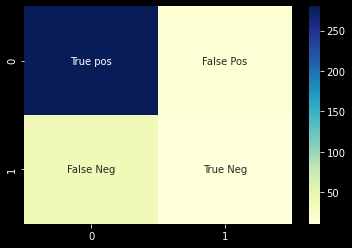

In [96]:
labels =["True pos", "False Pos", "False Neg", "True Neg"] 
labels = np.array(labels).reshape(2,2)
sns.heatmap(confusion, annot=labels, cmap="YlGnBu", fmt="")

In [97]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [98]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [99]:
from sklearn.linear_model import LogisticRegression
lrge = LogisticRegression(random_state=32, n_jobs=-1)
params = {"solver": ["newton-cg", "sag", "saga"]}
grid1= GridSearchCV(lrge, params, n_jobs=-1, verbose=5)
grid1.fit(x_train, y_train)

print("score for the best parameters:")
print(grid1.best_params_)
print("Training accuracy:", grid1.score(x_train, y_train))
print("Testing accuracy:", grid1.score(x_test, y_test))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
score for the best parameters:
{'solver': 'newton-cg'}
Training accuracy: 0.9971014492753624
Testing accuracy: 1.0


In [100]:
y_test_predict = grid1.predict(x_test)

print(classification_report (y_train, grid1.predict(x_train)))
print(classification_report(y_test, y_test_predict ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1176
           1       0.99      1.00      0.99       204

    accuracy                           1.00      1380
   macro avg       0.99      1.00      0.99      1380
weighted avg       1.00      1.00      1.00      1380

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       279
           1       1.00      1.00      1.00        67

    accuracy                           1.00       346
   macro avg       1.00      1.00      1.00       346
weighted avg       1.00      1.00      1.00       346



In [101]:
lg=mean_squared_error(y_test_predict,y_test)
rmse=np.sqrt(lg)
print("Mean Square Error: "+str(lg)+" Root Means Square Error: "+str(rmse)+"logistic")

Mean Square Error: 0.0 Root Means Square Error: 0.0logistic


[[279   0]
 [  0  67]]


Text(33.0, 0.5, 'Actuals')

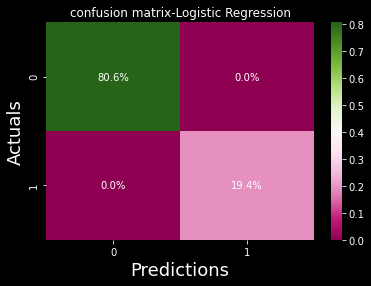

In [102]:
y_test_predict = grid1.predict(x_test)
confusion = confusion_matrix(y_test,y_test_predict)  
print(confusion)

sns.heatmap(confusion/np.sum(confusion), annot = True, cmap="PiYG", fmt=".1%" )
plt.title("confusion matrix-Logistic Regression")
plt.show
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)

<AxesSubplot:>

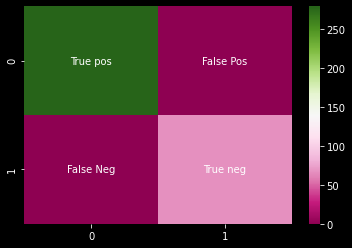

In [103]:
labels =["True pos", "False Pos", "False Neg", "True neg"] 
labels = np.array(labels).reshape(2,2)
sns.heatmap(confusion, annot=labels, cmap="PiYG", fmt="")

KERNELRIDGE

In [104]:
from sklearn.kernel_ridge import KernelRidge

In [105]:
ker= KernelRidge()

In [106]:
ker.fit(x_train,y_train)

KernelRidge()

In [107]:

y_pred=ker.predict(x_test)
y_pred

array([-2.61193141e-04,  7.12068100e-03,  1.80415502e-02,  2.45835446e-03,
        4.57881028e-02, -6.38380647e-04,  5.27536217e-03, -1.26298238e-03,
        4.23830934e-03,  6.71252795e-03,  2.61369068e-03, -1.02900378e-02,
        6.91906456e-03,  3.46473418e-03,  9.84883930e-01,  1.24784922e-02,
        9.78522095e-01, -2.40887515e-04,  9.68918500e-01,  9.71546463e-01,
       -7.00238720e-03,  2.29509659e-02,  2.72751804e-02,  1.58632444e-02,
        2.00123377e-02,  9.72397979e-01, -2.71873232e-02,  5.86572848e-03,
       -2.24219793e-02,  4.77083027e-03,  1.44592049e-02, -1.70655008e-02,
        9.75484844e-01, -8.98982026e-03,  9.68211738e-01, -3.92100830e-02,
        9.81717261e-01,  6.92950282e-03,  9.50290682e-02, -1.53324008e-02,
        9.62754966e-01,  3.66854481e-04,  9.59076860e-01,  2.91077420e-03,
       -1.20354164e-03, -1.12116123e-02,  9.63308502e-01,  3.93377617e-04,
        9.04053263e-03,  7.03562796e-03,  5.38896490e-03,  9.66655337e-01,
       -3.55737377e-03,  

In [108]:
from sklearn.kernel_ridge import KernelRidge
model4 =KernelRidge () 
model4.fit(x_train,y_train)
y_test_pred = model4.predict(x_test)
training = model4.score(x_train, y_train)
print("Training accuracy:{:.3f}".format(training))
testing = model4.score(x_test, y_test)
print("Testing accuracy:{:.3f}".format(testing))

Training accuracy:0.983
Testing accuracy:0.996


In [109]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model4,x,y,cv=10,scoring='r2')
print(scores)
print("{:.3f}".format(scores.mean()))

[0.99800711 0.97548533 0.99809829 0.94961059 0.92408913 0.99233109
 0.97305235 0.99149695 0.98019941 0.99561435]
0.978


In [110]:
from sklearn.metrics import mean_squared_error

In [111]:
e=mean_squared_error(y_pred,y_test)
rmse=np.sqrt(e)
print("Mean Square Error: "+str(e)+" Root Means Square Error: "+str(rmse)+"  KernelRidge")

Mean Square Error: 0.0006363226470948896 Root Means Square Error: 0.02522543650950147  KernelRidge


Random Forest Regression


In [112]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()

In [113]:
from sklearn.metrics import mean_squared_error
e=mean_squared_error(y_pred,y_test)
rmse=np.sqrt(e)

In [114]:
print("Mean Square Error: "+str(e)+" Root Means Square Error: "+str(rmse)+"  RandomForestRegressor")

Mean Square Error: 0.0006363226470948896 Root Means Square Error: 0.02522543650950147  RandomForestRegressor


In [115]:
from sklearn.ensemble import RandomForestRegressor
rfr =RandomForestRegressor () 
rfr.fit(x_train,y_train)
y_test_pred = rfr.predict(x_test)
training = rfr.score(x_train, y_train)
print("Training accuracy:{:.3f}".format(training))
testing = rfr.score(x_test, y_test)
print("Testing accuracy:{:.3f}".format(testing))

Training accuracy:1.000
Testing accuracy:1.000


DECISION TREE

In [116]:
from sklearn.tree import DecisionTreeClassifier

In [117]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)



print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1380, 21) (1380,)
(346, 21) (346,)


In [118]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [119]:

dtc = DecisionTreeClassifier(random_state=0)
parameters = [{"criterion": ["gini", "entropy"], "max_depth": [5, 10, 15, 30]}]
grid = GridSearchCV(dtc, parameters, verbose=5, n_jobs=-1)
grid.fit(x_train, y_train)

print("Score for the best parameters")
print(grid.best_params_)
print("Traing accuracy:", grid.score(x_train, y_train))
print("Testing accuracy: ", grid.score(x_test, y_test))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Score for the best parameters
{'criterion': 'gini', 'max_depth': 5}
Traing accuracy: 1.0
Testing accuracy:  1.0


In [120]:
y_test_pt = grid.predict(x_test)
print(classification_report(y_test, y_test_pt ))
print(classification_report (y_train, grid.predict(x_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       293
           1       1.00      1.00      1.00        53

    accuracy                           1.00       346
   macro avg       1.00      1.00      1.00       346
weighted avg       1.00      1.00      1.00       346

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1162
           1       1.00      1.00      1.00       218

    accuracy                           1.00      1380
   macro avg       1.00      1.00      1.00      1380
weighted avg       1.00      1.00      1.00      1380



In [121]:
ds=mean_squared_error(y_test_pt,y_test)
rmse=np.sqrt(ds)
print("Mean Square Error: "+str(ds)+" Root Means Square Error: "+str(rmse)+"decision tree")

Mean Square Error: 0.0 Root Means Square Error: 0.0decision tree


[[293   0]
 [  0  53]]


Text(33.0, 0.5, 'Actuals')

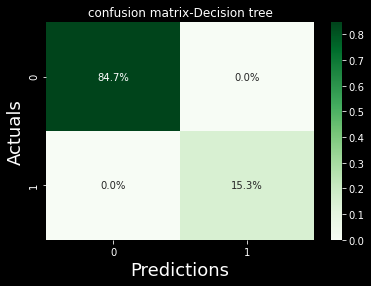

In [122]:
y_test_pt = grid.predict(x_test)
confusion = confusion_matrix(y_test,y_test_pt)  
print(confusion)

sns.heatmap(confusion/np.sum(confusion), annot = True, cmap="Greens", fmt=".1%" )
plt.title("confusion matrix-Decision tree")
plt.show
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)

<AxesSubplot:>

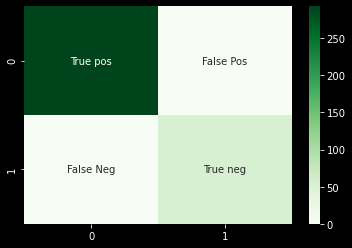

In [123]:
labels =["True pos", "False Pos", "False Neg", "True neg"] 
labels = np.array(labels).reshape(2,2)
sns.heatmap(confusion, annot=labels, cmap="Greens", fmt="")

svm

In [124]:
from sklearn.model_selection import train_test_split

# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score, confusion_matrix


X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)
from sklearn.svm import SVC

# Building a Support Vector Machine on train data
svc_model5 = SVC(C= .1, kernel='linear', gamma= 0.1)
svc_model5.fit(X_train, y_train)

prediction = svc_model5 .predict(X_test)
# check the accuracy on the training set
print(svc_model5.score(X_train, y_train))
print(svc_model5.score(X_test, y_test))


0.9985507246376811
0.9971098265895953


In [125]:
y_test_prediction = svc_model5.predict(x_test)
print(classification_report(y_test, y_test_prediction ))
print(classification_report (y_train, svc_model5.predict(x_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       293
           1       0.98      1.00      0.99        53

    accuracy                           1.00       346
   macro avg       0.99      1.00      0.99       346
weighted avg       1.00      1.00      1.00       346

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1162
           1       0.99      1.00      1.00       218

    accuracy                           1.00      1380
   macro avg       1.00      1.00      1.00      1380
weighted avg       1.00      1.00      1.00      1380



In [126]:
sm=mean_squared_error(y_test_pt,y_test)
rmse=np.sqrt(sm)
print("Mean Square Error: "+str(sm)+" Root Means Square Error: "+str(rmse)+"SVM")

Mean Square Error: 0.0 Root Means Square Error: 0.0SVM


[[292   1]
 [  0  53]]


Text(33.0, 0.5, 'Actuals')

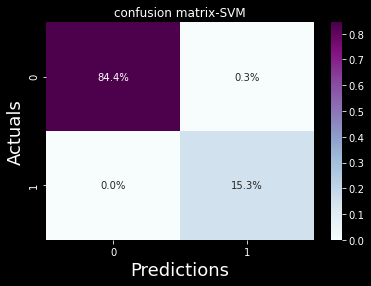

In [127]:
y_test_prediction = svc_model5.predict(x_test)
confusion = confusion_matrix(y_test,y_test_prediction)  
print(confusion)

sns.heatmap(confusion/np.sum(confusion), annot = True, cmap="BuPu", fmt=".1%" )
plt.title("confusion matrix-SVM")
plt.show
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)

<AxesSubplot:>

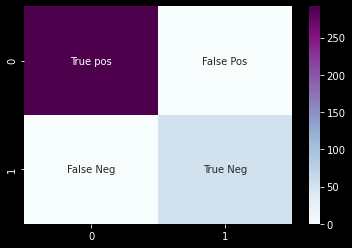

In [128]:
labels =["True pos", "False Pos", "False Neg", "True Neg"] 
labels = np.array(labels).reshape(2,2)
sns.heatmap(confusion, annot=labels, cmap="BuPu", fmt="")